**NYC JOB APPLICATION RECOMMENDATION**

>***by Mehmet Ozkemah***

During a recession time public-sector jobs are typically more stable than private-sector jobs. We similarly have been experiencing the same reality that public sector jobs are becoming more and more important during COVID-19. Healthcare employees, teachers,  nurses and police are needed regardless of business cycles.

New York City is the largest municipal government in the United States. More than 325,000 employees work at over 60 different agencies and offices.

The city government is responsible for public education, correctional institutions, public safety, recreational facilities, sanitation, water supply, and welfare services.

Every year thousands of people apply for different positions available in the New York City government. 


This dataset contains current job postings available on the City of New York’s official jobs site. Internal postings available to city employees and external postings available to the general public are included.

**This project aims** to help NYC job seekers to understand the demand for certain professions, job titles, salary ranges, or industries and define skills that are most frequently required by employers and make recommendations accordingly.

The output of project is also important for the  companies who deal with resume development.

Please click below for project overview

**GITHUB LINK (I will give a link here where you may find final presentation and model comparison tables after project approval)**


Please click for raw data and source

[NYC Jobs](https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t/data)

Thank you

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")
from collections import Counter
import nltk
import spacy
import re


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path= "/content/drive/My Drive/nyc-jobs-1.csv"

In [ ]:
nyc_jobs = pd.read_csv(path)

In [ ]:
nyc_jobs.head()

Job ID  ...         Process Date
0   87990  ...  2018-07-17T00:00:00
1   97899  ...  2018-07-17T00:00:00
2  102221  ...  2018-07-17T00:00:00
3  102221  ...  2018-07-17T00:00:00
4  114352  ...  2018-07-17T00:00:00

[5 rows x 28 columns]

In [ ]:
nyc_jobs.shape

(3420, 28)

In [ ]:
nyc_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         3420 non-null   int64  
 1   Agency                         3420 non-null   object 
 2   Posting Type                   3420 non-null   object 
 3   # Of Positions                 3420 non-null   int64  
 4   Business Title                 3420 non-null   object 
 5   Civil Service Title            3420 non-null   object 
 6   Title Code No                  3420 non-null   object 
 7   Level                          3420 non-null   object 
 8   Job Category                   3420 non-null   object 
 9   Full-Time/Part-Time indicator  3420 non-null   object 
 10  Salary Range From              3420 non-null   object 
 11  Salary Range To                3420 non-null   float64
 12  Salary Frequency               3420 non-null   o

In [ ]:
nyc_jobs.count()

Job ID                           3420
Agency                           3420
Posting Type                     3420
# Of Positions                   3420
Business Title                   3420
Civil Service Title              3420
Title Code No                    3420
Level                            3420
Job Category                     3420
Full-Time/Part-Time indicator    3420
Salary Range From                3420
Salary Range To                  3420
Salary Frequency                 3420
Work Location                    3420
Division/Work Unit               3420
Job Description                  3420
Minimum Qual Requirements        3408
Preferred Skills                 3420
Additional Information           3418
To Apply                         3420
Hours/Shift                      3420
Work Location 1                  3420
Recruitment Contact                94
Residency Requirement            3326
Posting Date                     3420
Post Until                       1402
Posting Upda

**DATA CLEANING**

Handling with messy column names

First I will fix column names. I will change " " and "/" with "_"

In [ ]:
nyc_jobs.columns = nyc_jobs.columns.str.replace(' ', '_')
nyc_jobs.columns = nyc_jobs.columns.str.replace('/', '_')
nyc_jobs.columns = nyc_jobs.columns.str.replace('-', '_')
nyc_jobs.columns = nyc_jobs.columns.str.replace('#', 'Number')


In [ ]:
nyc_jobs.head(5)

Job_ID  ...         Process_Date
0   87990  ...  2018-07-17T00:00:00
1   97899  ...  2018-07-17T00:00:00
2  102221  ...  2018-07-17T00:00:00
3  102221  ...  2018-07-17T00:00:00
4  114352  ...  2018-07-17T00:00:00

[5 rows x 28 columns]

In [ ]:
nyc_jobs.describe()

Job_ID  Number_Of_Positions  Salary_Range_To
count   3420.000             3420.000         3420.000
mean  323774.918                2.340        79362.128
std    42439.736                8.759        40366.890
min    87990.000                1.000           10.360
25%   316286.500                1.000        57916.000
50%   342267.000                1.000        77976.500
75%   348494.000                1.000       100000.000
max   354182.000              200.000       224749.000

I can't see Salary Range From column in describe function as this column may have some non-numeric entries. I can remove non-numeric entries from my dataset.

In [ ]:
nyc_jobs = nyc_jobs[nyc_jobs.Salary_Range_From.apply(lambda x: x.isnumeric())]

Lastly, I turn Salary Range From and Salary Range To columns to int. which looks as different type.

In [ ]:
nyc_jobs["Salary_Range_From"] = nyc_jobs.Salary_Range_From.astype(int)
nyc_jobs["Salary_Range_To"] = nyc_jobs.Salary_Range_To.astype(int)

I also want to remove some "0" entries in Salary Range From column.

In [ ]:
nyc_jobs =nyc_jobs[nyc_jobs['Salary_Range_From'] != 0]

In [ ]:
nyc_jobs =nyc_jobs[nyc_jobs['Salary_Range_To'] != 0]

In [ ]:
nyc_jobs[nyc_jobs["Salary_Range_From"] == 0]

Empty DataFrame
Columns: [Job_ID, Agency, Posting_Type, Number_Of_Positions, Business_Title, Civil_Service_Title, Title_Code_No, Level, Job_Category, Full_Time_Part_Time_indicator, Salary_Range_From, Salary_Range_To, Salary_Frequency, Work_Location, Division_Work_Unit, Job_Description, Minimum_Qual_Requirements, Preferred_Skills, Additional_Information, To_Apply, Hours_Shift, Work_Location_1, Recruitment_Contact, Residency_Requirement, Posting_Date, Post_Until, Posting_Updated, Process_Date]
Index: []

In [ ]:
nyc_jobs[nyc_jobs["Salary_Range_To"] == 0]

Empty DataFrame
Columns: [Job_ID, Agency, Posting_Type, Number_Of_Positions, Business_Title, Civil_Service_Title, Title_Code_No, Level, Job_Category, Full_Time_Part_Time_indicator, Salary_Range_From, Salary_Range_To, Salary_Frequency, Work_Location, Division_Work_Unit, Job_Description, Minimum_Qual_Requirements, Preferred_Skills, Additional_Information, To_Apply, Hours_Shift, Work_Location_1, Recruitment_Contact, Residency_Requirement, Posting_Date, Post_Until, Posting_Updated, Process_Date]
Index: []

No '0' values anymore.

In [ ]:
nyc_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 0 to 3419
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Job_ID                         3029 non-null   int64 
 1   Agency                         3029 non-null   object
 2   Posting_Type                   3029 non-null   object
 3   Number_Of_Positions            3029 non-null   int64 
 4   Business_Title                 3029 non-null   object
 5   Civil_Service_Title            3029 non-null   object
 6   Title_Code_No                  3029 non-null   object
 7   Level                          3029 non-null   object
 8   Job_Category                   3029 non-null   object
 9   Full_Time_Part_Time_indicator  3029 non-null   object
 10  Salary_Range_From              3029 non-null   int64 
 11  Salary_Range_To                3029 non-null   int64 
 12  Salary_Frequency               3029 non-null   object
 13  Wor

In [ ]:
nyc_jobs.describe()

Job_ID  Number_Of_Positions  Salary_Range_From  Salary_Range_To
count   3029.000             3029.000           3029.000         3029.000
mean  323113.004                1.984          61400.319        86803.432
std    42969.843                5.730          22313.133        34421.344
min    87990.000                1.000             13.000           14.000
25%   315927.000                1.000          49390.000        62315.000
50%   342013.000                1.000          57065.000        79726.000
75%   348420.000                1.000          70286.000       103636.000
max   354182.000              120.000         209585.000       224749.000

In [ ]:
nyc_jobs.head(5)

Job_ID  ...         Process_Date
0   87990  ...  2018-07-17T00:00:00
1   97899  ...  2018-07-17T00:00:00
2  102221  ...  2018-07-17T00:00:00
3  102221  ...  2018-07-17T00:00:00
4  114352  ...  2018-07-17T00:00:00

[5 rows x 28 columns]

Now it's time to remove unnecessarily columns which have no contribution to dataset.

Civil Service Title

Title Code No

Work Location

Division/Work Unit

Work Location 1

Recruitment Contact

In [ ]:
nyc_jobs = nyc_jobs.drop(['Civil_Service_Title', 'Title_Code_No', 'Work_Location', 'Division_Work_Unit', 'Work_Location_1', 'Recruitment_Contact'], axis=1)

Duplicated Values

In [ ]:
duplicaterows_df = nyc_jobs[nyc_jobs.duplicated()]

In [ ]:
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicaterows_df)

Duplicate Rows except first occurrence based on all columns are :
      Job_ID  ...         Process_Date
91    190197  ...  2018-07-17T00:00:00
146   226791  ...  2018-07-17T00:00:00
227   242877  ...  2018-07-17T00:00:00
235   243565  ...  2018-07-17T00:00:00
275   250320  ...  2018-07-17T00:00:00
329   268307  ...  2018-07-17T00:00:00
356   272463  ...  2018-07-17T00:00:00
382   276007  ...  2018-07-17T00:00:00
396   276892  ...  2018-07-17T00:00:00
437   280202  ...  2018-07-17T00:00:00
439   280203  ...  2018-07-17T00:00:00
451   282117  ...  2018-07-17T00:00:00
463   283459  ...  2018-07-17T00:00:00
471   284447  ...  2018-07-17T00:00:00
556   289816  ...  2018-07-17T00:00:00
603   292478  ...  2018-07-17T00:00:00
691   305978  ...  2018-07-17T00:00:00
793   312679  ...  2018-07-17T00:00:00
805   313659  ...  2018-07-17T00:00:00
1052  322800  ...  2018-07-17T00:00:00
1115  332660  ...  2018-07-17T00:00:00
1618  341264  ...  2018-07-17T00:00:00
1701  342017  ...  2018-07-17T00:00:0

Let's remove this 35 duplicated entrance

In [ ]:
print('Duplicate data entries: {}'.format(nyc_jobs.duplicated().sum()))
nyc_jobs.drop_duplicates(inplace = True)

Duplicate data entries: 35


In [ ]:
nyc_jobs.shape

(2994, 22)

Missing Values

In [ ]:
nyc_jobs.isnull().sum()

Job_ID                              0
Agency                              0
Posting_Type                        0
Number_Of_Positions                 0
Business_Title                      0
Level                               0
Job_Category                        0
Full_Time_Part_Time_indicator       0
Salary_Range_From                   0
Salary_Range_To                     0
Salary_Frequency                    0
Job_Description                     0
Minimum_Qual_Requirements          10
Preferred_Skills                    0
Additional_Information              2
To_Apply                            0
Hours_Shift                         0
Residency_Requirement               0
Posting_Date                        0
Post_Until                       1833
Posting_Updated                     0
Process_Date                        0
dtype: int64

Let's see missing values percentage;

In [ ]:
missing_vals = (nyc_jobs.isnull().sum()/len(nyc_jobs)).sort_values(ascending=False)
missing_vals

Post_Until                      0.612
Minimum_Qual_Requirements       0.003
Additional_Information          0.001
Process_Date                    0.000
Salary_Range_From               0.000
Agency                          0.000
Posting_Type                    0.000
Number_Of_Positions             0.000
Business_Title                  0.000
Level                           0.000
Job_Category                    0.000
Full_Time_Part_Time_indicator   0.000
Salary_Frequency                0.000
Salary_Range_To                 0.000
Posting_Updated                 0.000
Job_Description                 0.000
Preferred_Skills                0.000
To_Apply                        0.000
Hours_Shift                     0.000
Residency_Requirement           0.000
Posting_Date                    0.000
Job_ID                          0.000
dtype: float64

I don't have too much null values.

61% of 'Post_Until' data is missing. So, it's better to remove this column from dataset.



In [ ]:
nyc_jobs = nyc_jobs.drop(["Post_Until"], axis=1)

And now I can remove  a few null values from 'Minimum_Qual_Requirements' and 'Additional_Information' columns 

In [ ]:
nyc_jobs = nyc_jobs.dropna(subset=['Minimum_Qual_Requirements', 'Additional_Information'])

In [ ]:
nyc_jobs.isnull().sum()

Job_ID                           0
Agency                           0
Posting_Type                     0
Number_Of_Positions              0
Business_Title                   0
Level                            0
Job_Category                     0
Full_Time_Part_Time_indicator    0
Salary_Range_From                0
Salary_Range_To                  0
Salary_Frequency                 0
Job_Description                  0
Minimum_Qual_Requirements        0
Preferred_Skills                 0
Additional_Information           0
To_Apply                         0
Hours_Shift                      0
Residency_Requirement            0
Posting_Date                     0
Posting_Updated                  0
Process_Date                     0
dtype: int64

In [ ]:
nyc_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2982 entries, 0 to 3419
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Job_ID                         2982 non-null   int64 
 1   Agency                         2982 non-null   object
 2   Posting_Type                   2982 non-null   object
 3   Number_Of_Positions            2982 non-null   int64 
 4   Business_Title                 2982 non-null   object
 5   Level                          2982 non-null   object
 6   Job_Category                   2982 non-null   object
 7   Full_Time_Part_Time_indicator  2982 non-null   object
 8   Salary_Range_From              2982 non-null   int64 
 9   Salary_Range_To                2982 non-null   int64 
 10  Salary_Frequency               2982 non-null   object
 11  Job_Description                2982 non-null   object
 12  Minimum_Qual_Requirements      2982 non-null   object
 13  Pre

Now I have no null values.

Converting Data to Right Type

I need to turn some date columns into datetime

In [ ]:
from datetime import datetime
import datetime

In [ ]:
nyc_jobs['Posting_Date'] = pd.to_datetime(nyc_jobs['Posting_Date'])
nyc_jobs['Posting_Updated'] = pd.to_datetime(nyc_jobs['Posting_Updated'])
nyc_jobs['Process_Date'] = pd.to_datetime(nyc_jobs['Process_Date'])

In [ ]:
nyc_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2982 entries, 0 to 3419
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job_ID                         2982 non-null   int64         
 1   Agency                         2982 non-null   object        
 2   Posting_Type                   2982 non-null   object        
 3   Number_Of_Positions            2982 non-null   int64         
 4   Business_Title                 2982 non-null   object        
 5   Level                          2982 non-null   object        
 6   Job_Category                   2982 non-null   object        
 7   Full_Time_Part_Time_indicator  2982 non-null   object        
 8   Salary_Range_From              2982 non-null   int64         
 9   Salary_Range_To                2982 non-null   int64         
 10  Salary_Frequency               2982 non-null   object        
 11  Job_Description  

Let's see how many unique values we have for each column

In [ ]:
nyc_jobs.nunique()

Job_ID                           1638
Agency                             49
Posting_Type                        2
Number_Of_Positions                25
Business_Title                   1297
Level                              16
Job_Category                      129
Full_Time_Part_Time_indicator       3
Salary_Range_From                 411
Salary_Range_To                   548
Salary_Frequency                    3
Job_Description                  1577
Minimum_Qual_Requirements         362
Preferred_Skills                 1240
Additional_Information            593
To_Apply                         1072
Hours_Shift                       173
Residency_Requirement              57
Posting_Date                      436
Posting_Updated                   404
Process_Date                        1
dtype: int64

Looks like I have some categorical values;

Agency

Posting Type

Level

Full-Time_Part-Time_indicator

Salary_Frequency 

There is only 1 unique value in Process_Date column which means it's same for each column. It is not contributing to my dataset and I will delete this column.

In [ ]:
nyc_jobs = nyc_jobs.drop(["Process_Date"], axis=1)

In [ ]:
nyc_jobs.nunique().sort_values(ascending=False)

Job_ID                           1638
Job_Description                  1577
Business_Title                   1297
Preferred_Skills                 1240
To_Apply                         1072
Additional_Information            593
Salary_Range_To                   548
Posting_Date                      436
Salary_Range_From                 411
Posting_Updated                   404
Minimum_Qual_Requirements         362
Hours_Shift                       173
Job_Category                      129
Residency_Requirement              57
Agency                             49
Number_Of_Positions                25
Level                              16
Salary_Frequency                    3
Full_Time_Part_Time_indicator       3
Posting_Type                        2
dtype: int64

Now I want to create a new column which takes the difference between Salary Fange From and Salary Range To.

I want to see the difference between ranges on a position or level based.

This new column will show % change from lower limit of salary to upper limit of salary.

In [ ]:
nyc_jobs['Salary_Range_Difference'] = (nyc_jobs['Salary_Range_To'] - nyc_jobs['Salary_Range_From']) / nyc_jobs['Salary_Range_From'] * 100
nyc_jobs.head(5)

Job_ID  ... Salary_Range_Difference
0   87990  ...                  54.428
1   97899  ...                 166.734
2  102221  ...                  21.101
3  102221  ...                  21.101
4  114352  ...                   0.000

[5 rows x 21 columns]

In [ ]:
nyc_jobs['Average_Salary'] = (nyc_jobs['Salary_Range_To'] + nyc_jobs['Salary_Range_From']) / 2
nyc_jobs.head(5)

Job_ID  ... Average_Salary
0   87990  ...      53945.000
1   97899  ...     111377.000
2  102221  ...      47922.500
3  102221  ...      47922.500
4  114352  ...     109850.000

[5 rows x 22 columns]

I want to take it next to Salary ranges columns

In [ ]:
nyc_jobs.insert(10,'Average_Salary', nyc_jobs.pop("Average_Salary"))

In [ ]:
nyc_jobs.insert(11,'Average_Salary', nyc_jobs.pop("Average_Salary"))

In [ ]:
nyc_jobs.head(5)

Job_ID  ... Salary_Range_Difference
0   87990  ...                  54.428
1   97899  ...                 166.734
2  102221  ...                  21.101
3  102221  ...                  21.101
4  114352  ...                   0.000

[5 rows x 22 columns]

Let's see which business title's have the highest salary range difference.

In [ ]:
top10_range_difference = nyc_jobs.sort_values('Average_Salary', ascending=False).head(10)[['Agency', 'Level', 'Business_Title','Salary_Range_From', 'Salary_Range_To', 'Salary_Range_Difference']]
top10_range_difference

Agency  ... Salary_Range_Difference
1025  DEPT OF ENVIRONMENT PROTECTION  ...                   0.000
1024  DEPT OF ENVIRONMENT PROTECTION  ...                   0.000
1023  DEPT OF ENVIRONMENT PROTECTION  ...                   0.000
1022  DEPT OF ENVIRONMENT PROTECTION  ...                   0.000
110   DEPT OF ENVIRONMENT PROTECTION  ...                   0.000
111   DEPT OF ENVIRONMENT PROTECTION  ...                   0.000
2979   DEPT OF HEALTH/MENTAL HYGIENE  ...                  26.074
2980   DEPT OF HEALTH/MENTAL HYGIENE  ...                  26.074
931            NYC HOUSING AUTHORITY  ...                   5.405
930            NYC HOUSING AUTHORITY  ...                   5.405

[10 rows x 6 columns]

There are some interesting findings here;

Top 10 salary ranges are from Level 0 jobs.

7 out of 10 highest salary range diffrence is from Dept Of Environment Protection

Now, I will create 3 different class for as low, mid and high salary. 

1 means; Low Salary

2 means; Mid Salary

3 means; Hihg Salary

In [ ]:
def conditions(Average_Salary):
    if Average_Salary < 60001:
        return 1
    elif Average_Salary > 60000 and Average_Salary < 90000:
        return 2
    else:
        return 3

In [ ]:
func = np.vectorize(conditions)
Salary_Class = func(nyc_jobs["Average_Salary"])

In [ ]:
nyc_jobs["Salary_Class"] = Salary_Class

Let's take this new column next to Averag_Salary column

In [ ]:
nyc_jobs.insert(12,'Salary_Class', nyc_jobs.pop("Salary_Class"))

In [ ]:
nyc_jobs.head(5)

Job_ID  ... Salary_Range_Difference
0   87990  ...                  54.428
1   97899  ...                 166.734
2  102221  ...                  21.101
3  102221  ...                  21.101
4  114352  ...                   0.000

[5 rows x 23 columns]

**DATA EXPLORATION**

In [ ]:
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import palettable
init_notebook_mode(connected=True)  
from geopy.geocoders import Nominatim
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import plotly.figure_factory as ff
from matplotlib.pyplot import *

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

Posting_Type

In [ ]:
nyc_jobs['Posting_Type'].value_counts(dropna=False)

Internal    1633
External    1349
Name: Posting_Type, dtype: int64

In [ ]:
def pie_plot(cnts, colors, title):
    labels = cnts.index
    values = cnts.values
    
    trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   textinfo='value', textfont=dict(size=20),
                   hoverinfo='label+percent',
                   hole=.77,
                   textposition='inside',
                   marker=dict(colors=colors,
                               line=dict(color='#000000', width=2)
                              )
                  )
    return trace




In [ ]:
py.iplot([pie_plot(nyc_jobs['Posting_Type'].value_counts(), ['salmon ', 'turquoise'], 'Posting_Type')])

There are 1671 internal and 1352 external job postings.

Full-Time_Part-Time_indicator

In [ ]:
nyc_jobs['Full_Time_Part_Time_indicator'].value_counts(dropna=False)

F    2708
      246
P      28
Name: Full_Time_Part_Time_indicator, dtype: int64

Most of job postings are for Full-time jobs(2746)

There are a few Part time job posting (28)

249 job posts have no detail if it is full or part time

Let's assign a name for this 249 values. I will call it "Other" 

In [ ]:
nyc_jobs[(nyc_jobs["Full_Time_Part_Time_indicator"] == " ")]

Job_ID  ... Salary_Range_Difference
0      87990  ...                  54.428
10    342355  ...                  32.063
65    171944  ...                  22.424
68    177048  ...                  17.968
79    184328  ...                 102.053
...      ...  ...                     ...
3329  352298  ...                   9.804
3347  352387  ...                  12.993
3348  352387  ...                  12.993
3386  353184  ...                 167.224
3387  353184  ...                 167.224

[246 rows x 23 columns]

In [ ]:
nyc_jobs.Full_Time_Part_Time_indicator = nyc_jobs.Full_Time_Part_Time_indicator.str.replace(' ', 'Other')

Let's check If it's done.

In [ ]:
nyc_jobs['Full_Time_Part_Time_indicator'].value_counts(dropna=False)

F        2708
Other     246
P          28
Name: Full_Time_Part_Time_indicator, dtype: int64

In [ ]:
py.iplot([pie_plot(nyc_jobs['Full_Time_Part_Time_indicator'].value_counts(), ['salmon', 'turquoise'], 'Posting_Type')])

Salary_Frequency

In [ ]:
nyc_jobs['Salary_Frequency'].value_counts(dropna=False)

Annual    2953
Hourly      22
Daily        7
Name: Salary_Frequency, dtype: int64

In [ ]:
nyc_jobs['Salary_Frequency'].value_counts(dropna=False) / len(nyc_jobs.Salary_Frequency)

Annual   0.990
Hourly   0.007
Daily    0.002
Name: Salary_Frequency, dtype: float64

As you can see above 99% of the Salary frequency in the job posts are Annual.

There are only a few Hourly and Daily Salary Frequency. In terms of fair comparison I will remove those few entrance from my dataset.


In [ ]:
nyc_jobs =nyc_jobs[nyc_jobs['Salary_Frequency'] == "Annual"]

Salary_Class

In [ ]:
py.iplot([pie_plot(nyc_jobs['Salary_Class'].value_counts(), ['salmon ', 'turquoise'], 'Salary_Class')])

Salary_Class is well balanced. 

Class 2 has the highest number of vacancy.

Level

In [ ]:
nyc_jobs['Level'].value_counts(dropna=False)

0     1007
2      542
1      519
3      260
M1     246
M2     119
M3      98
M4      57
4       47
M5      17
4A      10
M7      10
MY      10
4B       4
3A       4
M6       3
Name: Level, dtype: int64

How many vacancy available for each level?

In [ ]:
py.iplot([pie_plot(nyc_jobs['Level'].value_counts(), ['salmon', 'turquoise'], 'Level')])

Level 0 has the most number of vacancy followed by Level 2 and Level 1

Job Category

In [ ]:
top10_category = nyc_jobs['Job_Category'].value_counts().nlargest(10)
top10_category

Engineering, Architecture, & Planning        415
Health                                       393
Technology, Data & Innovation                306
Public Safety, Inspections, & Enforcement    200
Finance, Accounting, & Procurement           181
Legal Affairs                                150
Constituent Services & Community Programs    148
Policy, Research & Analysis                  138
Administration & Human Resources             120
Social Services                              100
Name: Job_Category, dtype: int64

Above, we can see Top 10 job category

Let's see as barchart

In [ ]:
top_categories = (nyc_jobs.groupby('Job_Category')['Salary_Range_To'].mean().nlargest(10)).reset_index() 

Text(0.5, 1.0, 'Highest 10 Salary by Job Category')

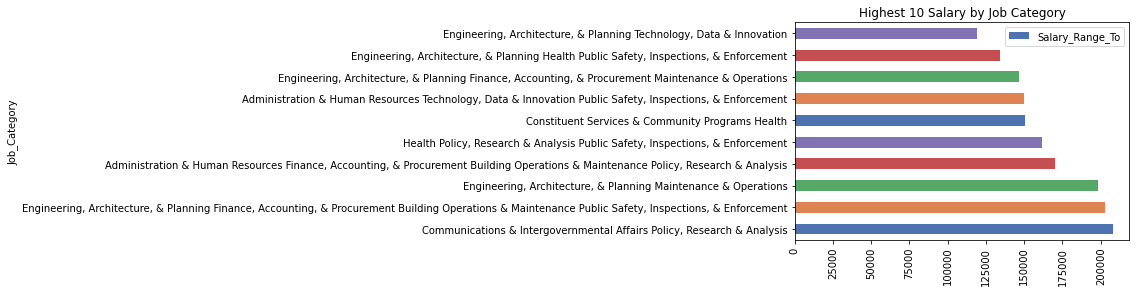

In [ ]:
top_categories.plot("Job_Category", "Salary_Range_To", kind="barh", color=sns.color_palette("deep", 5))
plt.xticks(rotation=90)
plt.title("Highest 10 Salary by Job Category")

Agency

Let's check which agency is hiring most

In [ ]:
nyc_jobs['Agency'].value_counts(dropna=False)

DEPT OF HEALTH/MENTAL HYGIENE     668
DEPT OF ENVIRONMENT PROTECTION    590
DEPARTMENT OF TRANSPORTATION      162
ADMIN FOR CHILDREN'S SVCS         133
DEPT OF INFO TECH & TELECOMM      130
HOUSING PRESERVATION & DVLPMNT    110
LAW DEPARTMENT                     94
DEPT OF DESIGN & CONSTRUCTION      88
DEPARTMENT OF INVESTIGATION        74
DEPARTMENT OF BUSINESS SERV.       68
NYC HOUSING AUTHORITY              59
MAYORS OFFICE OF CONTRACT SVCS     56
OFFICE OF THE COMPTROLLER          53
HRA/DEPT OF SOCIAL SERVICES        51
NYC EMPLOYEES RETIREMENT SYS       44
POLICE DEPARTMENT                  41
DEPARTMENT OF SANITATION           40
TAXI & LIMOUSINE COMMISSION        39
FINANCIAL INFO SVCS AGENCY         38
DEPT OF CITYWIDE ADMIN SVCS        34
DEPT OF PARKS & RECREATION         34
DEPARTMENT OF CORRECTION           34
DEPARTMENT FOR THE AGING           32
DEPARTMENT OF PROBATION            32
ADMIN TRIALS AND HEARINGS          28
OFFICE OF EMERGENCY MANAGEMENT     26
CIVILIAN COM

In [ ]:
nyc_jobs['Agency'].value_counts(dropna=False) / len(nyc_jobs.Agency)

DEPT OF HEALTH/MENTAL HYGIENE    0.226
DEPT OF ENVIRONMENT PROTECTION   0.200
DEPARTMENT OF TRANSPORTATION     0.055
ADMIN FOR CHILDREN'S SVCS        0.045
DEPT OF INFO TECH & TELECOMM     0.044
HOUSING PRESERVATION & DVLPMNT   0.037
LAW DEPARTMENT                   0.032
DEPT OF DESIGN & CONSTRUCTION    0.030
DEPARTMENT OF INVESTIGATION      0.025
DEPARTMENT OF BUSINESS SERV.     0.023
NYC HOUSING AUTHORITY            0.020
MAYORS OFFICE OF CONTRACT SVCS   0.019
OFFICE OF THE COMPTROLLER        0.018
HRA/DEPT OF SOCIAL SERVICES      0.017
NYC EMPLOYEES RETIREMENT SYS     0.015
POLICE DEPARTMENT                0.014
DEPARTMENT OF SANITATION         0.014
TAXI & LIMOUSINE COMMISSION      0.013
FINANCIAL INFO SVCS AGENCY       0.013
DEPT OF CITYWIDE ADMIN SVCS      0.012
DEPT OF PARKS & RECREATION       0.012
DEPARTMENT OF CORRECTION         0.012
DEPARTMENT FOR THE AGING         0.011
DEPARTMENT OF PROBATION          0.011
ADMIN TRIALS AND HEARINGS        0.009
OFFICE OF EMERGENCY MANAG

More than 60% of job postings are coming from below departments

DEPT OF HEALTH/MENTAL HYGIENE     
DEPT OF ENVIRONMENT PROTECTION    
DEPARTMENT OF TRANSPORTATION      
DEPT OF INFO TECH & TELECOMM      
ADMIN FOR CHILDREN'S SVCS         
HOUSING PRESERVATION & DVLPMNT  
LAW DEPARTMENT

In [ ]:
top10_department = nyc_jobs['Agency'].value_counts().nlargest(10)
top10_department

DEPT OF HEALTH/MENTAL HYGIENE     668
DEPT OF ENVIRONMENT PROTECTION    590
DEPARTMENT OF TRANSPORTATION      162
ADMIN FOR CHILDREN'S SVCS         133
DEPT OF INFO TECH & TELECOMM      130
HOUSING PRESERVATION & DVLPMNT    110
LAW DEPARTMENT                     94
DEPT OF DESIGN & CONSTRUCTION      88
DEPARTMENT OF INVESTIGATION        74
DEPARTMENT OF BUSINESS SERV.       68
Name: Agency, dtype: int64

In [ ]:
top_departments = (nyc_jobs.groupby('Agency')['Number_Of_Positions'].sum().nlargest(10)).reset_index() 

Text(0.5, 1.0, 'Top 10 Hiring Departments')

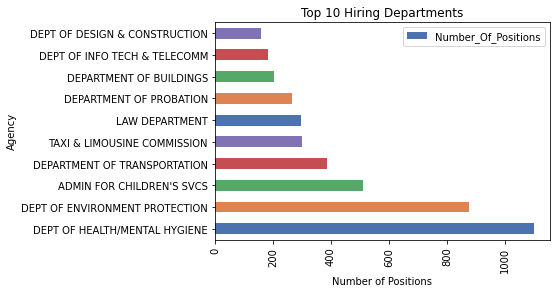

In [ ]:
top_departments.plot("Agency", "Number_Of_Positions", kind="barh", color=sns.color_palette("deep", 5))
plt.xticks(rotation=90)
plt.xlabel('Number of Positions')
plt.title("Top 10 Hiring Departments")

Dept of Health/Mental Hygiene and Dept Of Environment Protection are the most hired departments

Salary_Range_From

In [ ]:
top10salary = nyc_jobs.sort_values('Salary_Range_From', ascending=False).head(10)[['Business_Title', 'Agency', 'Salary_Range_From', 'Salary_Frequency']]
top10salary

Business_Title  ... Salary_Frequency
1025  Deputy Commissioner, Engineering Design & Cons...  ...           Annual
1022    Deputy Commissioner, Water and Sewer Operations  ...           Annual
1023    Deputy Commissioner, Water and Sewer Operations  ...           Annual
1024  Deputy Commissioner, Engineering Design & Cons...  ...           Annual
111           Deputy Commissioner, Wastewater Treatment  ...           Annual
110           Deputy Commissioner, Wastewater Treatment  ...           Annual
930                            Chief Compliance Officer  ...           Annual
931                            Chief Compliance Officer  ...           Annual
1248                     Assistant Commissioner, Budget  ...           Annual
1247                     Assistant Commissioner, Budget  ...           Annual

[10 rows x 4 columns]

The Agency of Top 4 Salary Range From is Dept Of Environment Protection and Business Title is Deputy Comissioner, Engineering Design&Cons ($209585 Annual Salary)

In [ ]:
 import plotly.express as px

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as py
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import palettable
init_notebook_mode(connected=True)  
from geopy.geocoders import Nominatim
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import plotly.figure_factory as ff
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import word2vec
import nltk
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import urllib.request
import random
from palettable.colorbrewer.sequential import Greens_9, Greys_9, Oranges_9, PuRd_9

In [ ]:
highest_salaries = (nyc_jobs.groupby('Business_Title')['Salary_Range_From'].mean().nlargest(10)).reset_index() 

In [ ]:
highest_salaries.head(10)

Business_Title  Salary_Range_From
0    Deputy Commissioner, Water and Sewer Operations         209585.000
1          Deputy Commissioner, Wastewater Treatment         198518.000
2                           Chief Compliance Officer         185000.000
3                     Assistant Commissioner, Budget         180000.000
4                           City Medical Examiner II         175507.000
5  Assistant Commissioner, Capital Planning & Del...         175000.000
6                                    General Counsel         175000.000
7        Deputy Commissioner, Training & Development         170000.000
8                  Deputy Director of Administration         157346.000
9     Assistant Commissioner of Real Estate Services         155000.000

Text(0.5, 1.0, 'Highest 10 Salary')

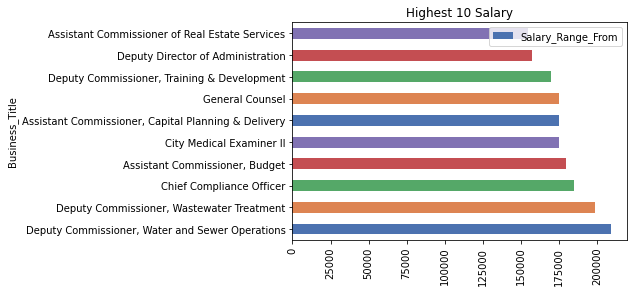

In [ ]:
highest_salaries.plot("Business_Title", "Salary_Range_From", kind="barh", color=sns.color_palette("deep", 5))
plt.xticks(rotation=90)
plt.title("Highest 10 Salary")

Let's check bottom 10 Salary_Range_From

In [ ]:
lowest_salaries = nyc_jobs.sort_values('Salary_Range_From', ascending=False).tail(10)[['Business_Title', 'Agency', 'Salary_Range_From', 'Salary_Frequency']]
lowest_salaries

Business_Title  ... Salary_Frequency
2029                                 Calendar Assistant  ...           Annual
2028                                 Calendar Assistant  ...           Annual
1657                             Community Service Aide  ...           Annual
1658                             Community Service Aide  ...           Annual
2096                     Client Services Representative  ...           Annual
2097                     Client Services Representative  ...           Annual
1031                     Client Services Representative  ...           Annual
1030                     Client Services Representative  ...           Annual
130   Pest Control Aide, Bureau of Veterinary and Pe...  ...           Annual
178   Pest Control Aide, Bureau of Veterinary and Pe...  ...           Annual

[10 rows x 4 columns]

As we can see, bottom 2 Salary_Range_From is $26457 from Department of Health/Mental Hygiene and Business Title is Pest Control Aide, Bureau of Veterinary

Text(0.5, 1.0, 'Lowest 10 Salary')

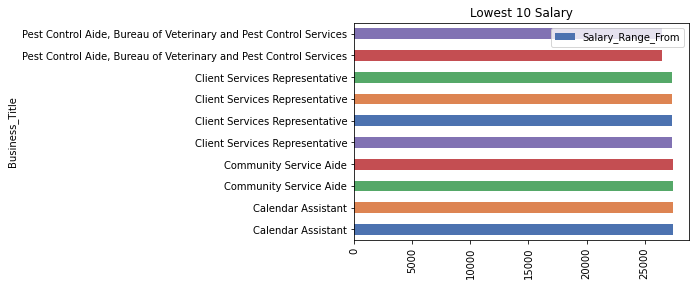

In [ ]:
lowest_salaries.plot("Business_Title", "Salary_Range_From", kind="barh", color=sns.color_palette("deep", 5))
plt.xticks(rotation=90)
plt.title("Lowest 10 Salary")

Salary_Range_To

In [ ]:
top10salary_to = nyc_jobs.sort_values('Salary_Range_To', ascending=False).head(10)[['Business_Title', 'Agency', 'Salary_Range_To']]
top10salary_to

Business_Title  ... Salary_Range_To
1117  General Counsel & Executive Vice President for...  ...          224749
1116  General Counsel & Executive Vice President for...  ...          224749
2979                           City Medical Examiner II  ...          221268
2980                           City Medical Examiner II  ...          221268
1022    Deputy Commissioner, Water and Sewer Operations  ...          209585
1023    Deputy Commissioner, Water and Sewer Operations  ...          209585
1024  Deputy Commissioner, Engineering Design & Cons...  ...          209585
1025  Deputy Commissioner, Engineering Design & Cons...  ...          209585
1742  Assistant Commissioner of Communications and P...  ...          208298
1743  Assistant Commissioner of Communications and P...  ...          208298

[10 rows x 3 columns]

The Agency of Top 2 Salary Range To is NYC Housing Authority and Business Title is General Counsel&Executive Vice President ($224749 Annual Salary)

What is the distribution of  Salary Range From by Level

In [ ]:
meansalary_bylevel = (nyc_jobs.groupby('Level')['Salary_Range_From'].mean()).reset_index()


In [ ]:
meansalary_bylevel.Salary_Range_From.sort_values(ascending = False)


14   161405.800
12   138139.412
11    98546.000
13    91070.000
6     90214.400
7     90084.000
10    88679.367
15    74000.000
9     69867.017
8     69520.785
3     67732.792
5     64728.745
2     62311.524
0     55308.224
4     52312.000
1     52053.364
Name: Salary_Range_From, dtype: float64

Text(0.5, 1.0, 'Mean Salary by Level')

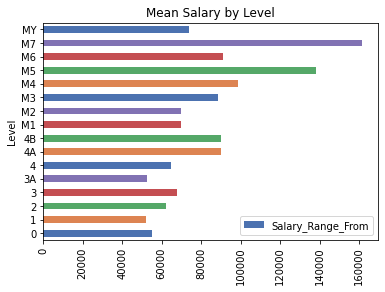

In [ ]:
meansalary_bylevel.plot("Level", "Salary_Range_From", kind="barh",color=sns.color_palette("deep", 5))
plt.xticks(rotation=90)
plt.title("Mean Salary by Level")

Which Agency hires with what kind of Posting Type?

In [ ]:
count_table = pd.crosstab(nyc_jobs["Agency"], nyc_jobs["Posting_Type"])
count_table

Posting_Type                    External  Internal
Agency                                            
ADMIN FOR CHILDREN'S SVCS             54        79
ADMIN TRIALS AND HEARINGS             12        16
BOARD OF CORRECTION                    2         2
BUSINESS INTEGRITY COMMISSION          1         1
CIVILIAN COMPLAINT REVIEW BD          10        14
CONSUMER AFFAIRS                      11        11
DEPARTMENT FOR THE AGING              17        15
DEPARTMENT OF BUILDINGS               10        10
DEPARTMENT OF BUSINESS SERV.          33        35
DEPARTMENT OF CITY PLANNING            9         9
DEPARTMENT OF CORRECTION              16        18
DEPARTMENT OF FINANCE                  1         1
DEPARTMENT OF INVESTIGATION           35        39
DEPARTMENT OF PROBATION               16        16
DEPARTMENT OF SANITATION              20        20
DEPARTMENT OF TRANSPORTATION          62       100
DEPT OF CITYWIDE ADMIN SVCS           17        17
DEPT OF DESIGN & CONSTRUCTION         44        44
DEPT OF ENVIRONMENT PROTECTION       269       321
DEPT OF HEALTH/MENTAL HYGIENE        325       343
DEPT OF INFO TECH & TELECOMM          48        82
DEPT OF PARKS & RECREATION            13        21
DEPT OF YOUTH & COMM DEV SRVS          9         9
DEPT. OF HOMELESS SERVICES             0         1
DISTRICT ATTORNEY RICHMOND COU         2         2
FINANCIAL INFO SVCS AGENCY            18        20
FIRE DEPARTMENT                        8        14
HOUSING PRESERVATION & DVLPMNT        54        56
HRA/DEPT OF SOCIAL SERVICES            9        42
HUMAN RIGHTS COMMISSION                7         7
LANDMARKS PRESERVATION COMM            2         2
LAW DEPARTMENT                        36        58
MANHATTAN COMMUNITY BOARD #3           1         1
MANHATTAN COMMUNITY BOARD #8           1         1
MAYORS OFFICE OF CONTRACT SVCS        28        28
NYC EMPLOYEES RETIREMENT SYS          22        22
NYC FIRE PENSION FUND                  1         1
NYC HOUSING AUTHORITY                 30        29
OFF OF PAYROLL ADMINISTRATION          0         5
OFFICE OF EMERGENCY MANAGEMENT        13        13
OFFICE OF MANAGEMENT & BUDGET          2         2
OFFICE OF THE ACTUARY                  2         2
OFFICE OF THE COMPTROLLER             26        27
POLICE DEPARTMENT                     11        30
PRESIDENT BOROUGH OF MANHATTAN         6         6
PUBLIC ADMINISTRATOR-NEW YORK          0         1
TAX COMMISSION                         2         2
TAXI & LIMOUSINE COMMISSION           19        20
TEACHERS RETIREMENT SYSTEM             2         2

Let's check Posting type based on level. Which level hires internal, which hires external? 

In [ ]:
count_table = pd.crosstab(nyc_jobs["Posting_Type"], nyc_jobs["Level"])
count_table

Level           0    1    2    3  3A   4  4A  ...  M2  M3  M4  M5  M6  M7  MY
Posting_Type                                  ...                            
External      469  242  236  101   2  18   5  ...  55  47  27   8   1   5   5
Internal      538  277  306  159   2  29   5  ...  64  51  30   9   2   5   5

[2 rows x 16 columns]

There is no meaningful difference between posting types based on levels.

Level 0, 1, 2 and 3 are the most internally and externally hired levels 

What Business Title is needed the most?

In [ ]:
max_positions = (nyc_jobs.groupby('Business_Title')['Number_Of_Positions'].mean().nlargest(10)).reset_index()
max_positions

Business_Title  Number_Of_Positions
0                       Youth Development Specialist              120.000
1                      ASSISTANT CORPORATION COUNSEL               80.000
2         Taxi and Limousine Inspector - Enforcement               80.000
3                                  Probation Officer               52.000
4                                   City Park Worker               50.000
5  Taxi and Limousine Inspector - Safety and Emis...               50.000
6                             Construction Inspector               45.000
7                                           Deckhand               32.000
8  Inspector, Bureau of Environmental Disease and...               28.000
9                                 Plumbing Inspector               20.000

Let's plot this

Text(0.5, 1.0, 'Most Hired Business Titles')

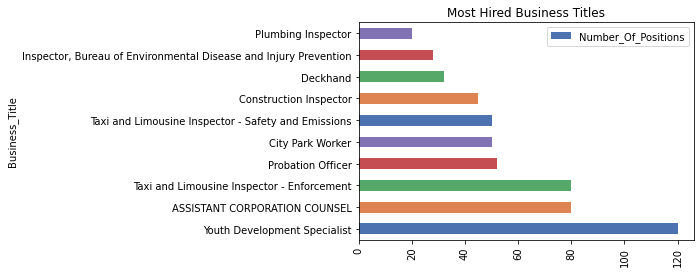

In [ ]:
max_positions.plot("Business_Title", "Number_Of_Positions", kind="barh", color=sns.color_palette("deep", 5))
plt.xticks(rotation=90)
plt.title("Most Hired Business Titles")

To check BusinessTitles based on Psting Type;

In [ ]:
count_table = pd.crosstab(nyc_jobs["Business_Title"], nyc_jobs["Posting_Type"])
count_table.head(10)

Posting_Type                                        External  Internal
Business_Title                                                        
311 Call Center Manager                                    0         3
311 Escalation Line Team Leader                            0         1
: Assoc. Director of Disaster Benefit Coordination         1         1
ACCOUNTABLE MANAGER                                        3         3
ACCOUNTS PAYABLE COORDINATOR                               1         1
ACCOUNTS PAYABLE OFFICER                                   1         1
ADM MANAGER-NON-MGRL FROM M1/M                             1         1
ADMINISTRATIVE ASSISTANT                                   0         1
ADMINISTRATIVE PROCUREMENT ANALYST                         1         1
AGENCY ATTORNEY                                            1         1

What is Top 10 median salary by Business Titles?

In [ ]:
median_salary = (nyc_jobs.groupby('Business_Title')['Salary_Range_From'].median().nlargest(10)).reset_index()
median_salary

Business_Title  Salary_Range_From
0    Deputy Commissioner, Water and Sewer Operations         209585.000
1          Deputy Commissioner, Wastewater Treatment         198518.000
2                           Chief Compliance Officer         185000.000
3                     Assistant Commissioner, Budget         180000.000
4                           City Medical Examiner II         175507.000
5  Assistant Commissioner, Capital Planning & Del...         175000.000
6                                    General Counsel         175000.000
7        Deputy Commissioner, Training & Development         170000.000
8                  Deputy Director of Administration         157346.000
9     Assistant Commissioner of Real Estate Services         155000.000

Text(0.5, 1.0, 'Most Common 10 Salary')

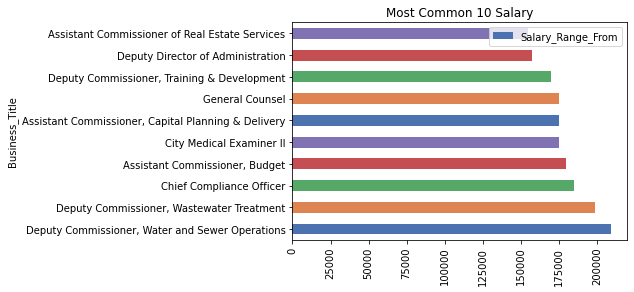

In [ ]:
median_salary.plot("Business_Title", "Salary_Range_From", kind="barh", color=sns.color_palette("deep", 5))
plt.xticks(rotation=90)
plt.title("Most Common 10 Salary")

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import folium
from folium.plugins import FastMarkerCluster
from wordcloud import WordCloud
from nltk.corpus import stopwords
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
def pie_plot(cnts, colors, title):
    labels = cnts.index
    values = cnts.values
    
    trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   textinfo='value', textfont=dict(size=20),
                   hoverinfo='label+percent',
                   hole=.77,
                   textposition='inside',
                   marker=dict(colors=colors,
                               line=dict(color='#000000', width=2)
                              )
                  )
    return trace

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

What Business Titles have the lowest average minimum Salary?

In [ ]:
salaries = nyc_jobs.groupby('Business_Title')['Salary_Range_From'].mean().sort_values(ascending=False).tail(10)

trace1 = go.Bar(x=salaries.values, 
                y=salaries.index,
                             width=0.6,
                marker=dict(color="salmon", 
                opacity=0.6, 
                line=dict(color="blue",
                          width=1.5),        
                                                                 
                ),
                orientation='h', name='Lowest 10 Minimum Salary on Average')

layout = dict(showlegend=False,
              title='Lowest 10 Minimum Salary on Average',
              yaxis=dict(
                  showgrid=False,
                  showline=False,
                  showticklabels=True,
                  
              ),
             xaxis=dict(
                  title='Salaries',
                  zeroline=False,
                  showline=False,
                  showticklabels=True,
                  showgrid=False,
             ),
             margin = dict(l=300, r=20, t=50, b=50),
            )
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

What Business Titles have the highest average maximum Salary?

In [ ]:
top_salaries = nyc_jobs.groupby('Business_Title')['Salary_Range_To'].mean().sort_values(ascending=False).head(10)

trace1 = go.Bar(y=top_salaries.index, x=top_salaries.values, width=0.6, 
                marker=dict(color='salmon',
                            opacity=0.6,
                            line=dict(color='blue',
                                      width=1.5)
                           ),
               orientation='h', name='Highest 10 Maximum Salary on Average')

layout = dict(showlegend=False,
             title='Top 10 Maximum Salary on Average',
             yaxis=dict(
                 showgrid=False,
                 showline=False,
                 showticklabels=True,
             ),
             xaxis=dict(
                 title='Salaries',
                 showgrid=False,
                 showline=False,
                 showticklabels=True
             ),
             margin=dict(l=300, r=20, t=50, b=50),
            )

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

I want to check histogram of Salary columns

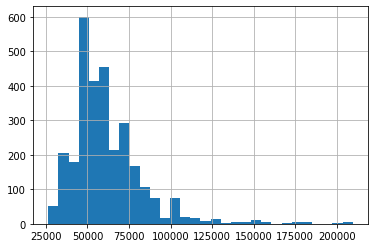

In [ ]:
nyc_jobs.Salary_Range_From.hist(bins=30)

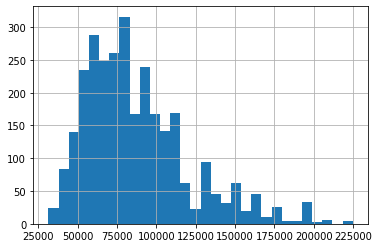

In [ ]:
nyc_jobs.Salary_Range_To.hist(bins=30)

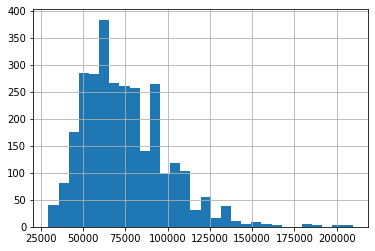

In [ ]:
nyc_jobs.Average_Salary.hist(bins=30)

Salary_Range_From, Salary_Range_To and Average_Salary seem to distribute normally, no need to apply any transformation method.


In [ ]:
nyc_jobs.Salary_Range_To.tail(5)

3413    65000
3414    78177
3415    78177
3418    95000
3419    95000
Name: Salary_Range_To, dtype: int64

Let's check my target value Salary_Class's Outliers with boxplot analysis

[Text(0.5, 0, 'Boxplot of Salary_Class')]

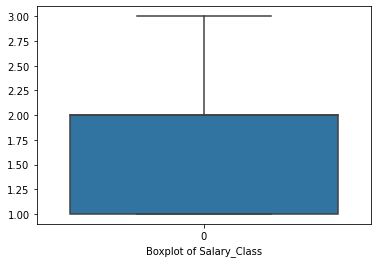

In [ ]:
box_plot=sns.boxplot(data=nyc_jobs.Salary_Class)
box_plot.set(xlabel='Boxplot of Salary_Class')

Looks like I have no outliers to deal with

Let's change the type of date columns.

In [ ]:
nyc_jobs['Posting_Date'] = pd.to_datetime(nyc_jobs.Posting_Date, format='%m/%d/%Y %H:%M')

In [ ]:
nyc_jobs['Posting_Updated'] = pd.to_datetime(nyc_jobs.Posting_Updated, format='%m/%d/%Y %H:%M')

What is the difference between last day and first day in the dataset?

In [ ]:
nyc_jobs.Posting_Date.max() - nyc_jobs.Posting_Date.min()

Timedelta('2580 days 00:00:00')

Now I want to split date to into some details like month, day.

In [ ]:
nyc_jobs['Month'] = nyc_jobs['Posting_Date'].dt.month
nyc_jobs['Day'] = nyc_jobs['Posting_Date'].dt.day
nyc_jobs['NbOfday'] = nyc_jobs['Posting_Date'].dt.weekday
nyc_jobs['Weekday'] = nyc_jobs['Posting_Date'].dt.day_name()

In [ ]:
nyc_jobs.head(5)

Job_ID                          Agency Posting_Type  ...  Day NbOfday    Weekday
0   87990    DEPARTMENT OF BUSINESS SERV.     Internal  ...   24       4     Friday
1   97899    DEPARTMENT OF BUSINESS SERV.     Internal  ...   26       3   Thursday
2  102221  DEPT OF ENVIRONMENT PROTECTION     External  ...   21       3   Thursday
3  102221  DEPT OF ENVIRONMENT PROTECTION     Internal  ...   21       3   Thursday
4  114352  DEPT OF ENVIRONMENT PROTECTION     Internal  ...   12       2  Wednesday

[5 rows x 27 columns]

Distribution of Job posts to weekdays;

In [ ]:
count_table = pd.crosstab(nyc_jobs["Job_ID"].mean(), nyc_jobs["Weekday"])
count_table

Weekday     Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
row_0                                                                     
323238.594     583     559        25       9       625      609        543

As expected, there is not too many job post on weekends. Among weekdays, Thursday have the highest number of job posts.

What is the distribution of job posts to month?

In [ ]:
nyc_jobs['Month'].value_counts().sort_index()

1     138
2     153
3     267
4     310
5     514
6     662
7     577
8      68
9      50
10     55
11     72
12     87
Name: Month, dtype: int64

Let's plot this;

Text(0.5, 1.0, 'Most Common 10 Salary')

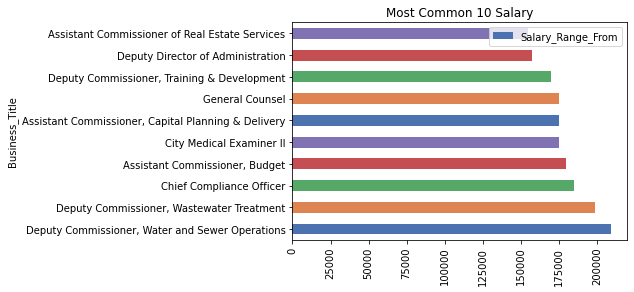

In [ ]:
median_salary.plot("Business_Title", "Salary_Range_From", kind="barh", color=sns.color_palette("deep", 5))
plt.xticks(rotation=90)
plt.title("Most Common 10 Salary")

Text(0, 0.5, 'Months')

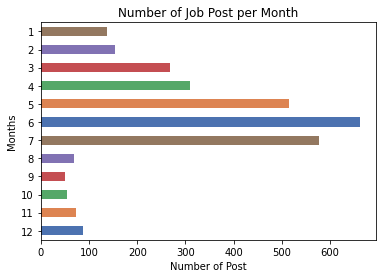

In [ ]:
nyc_jobs.Month.value_counts().sort_index(ascending=False).plot(kind='barh', color=sns.color_palette("deep", 6))
plt.title("Number of Job Post per Month")
plt.xlabel("Number of Post")
plt.ylabel("Months")

High season for hiring seems to be May-June-July.

March and April is also better than the rest of the year excluding high season.

What is the busiest days in a month?

In [ ]:
nyc_jobs['Day'].value_counts().sort_index()

1      95
2      80
3     114
4      56
5     106
6      88
7      59
8     110
9     109
10    140
11    120
12    134
13    164
14    172
15     58
16    138
17     59
18     85
19     81
20     75
21     90
22     91
23     73
24     67
25     95
26     77
27    100
28     61
29    147
30     58
31     51
Name: Day, dtype: int64

I will split the months into weeks and explore & compare the weeks

In [ ]:
first_week = nyc_jobs.loc[nyc_jobs['Day']<8]
second_week = nyc_jobs.loc[((nyc_jobs['Day'] > 7) & (nyc_jobs['Day'] < 15))]
third_week = nyc_jobs.loc[((nyc_jobs['Day'] > 14) & (nyc_jobs['Day'] < 22))]
fourth_week =  nyc_jobs.loc[nyc_jobs['Day']>21]

In [ ]:
nyc_jobs.head()

Job_ID                          Agency Posting_Type  ...  Day NbOfday    Weekday
0   87990    DEPARTMENT OF BUSINESS SERV.     Internal  ...   24       4     Friday
1   97899    DEPARTMENT OF BUSINESS SERV.     Internal  ...   26       3   Thursday
2  102221  DEPT OF ENVIRONMENT PROTECTION     External  ...   21       3   Thursday
3  102221  DEPT OF ENVIRONMENT PROTECTION     Internal  ...   21       3   Thursday
4  114352  DEPT OF ENVIRONMENT PROTECTION     Internal  ...   12       2  Wednesday

[5 rows x 27 columns]

I want to see how many job post in each week;

In [ ]:
first_week.Day.value_counts().sort_index().sum()

598

In [ ]:
second_week.Day.value_counts().sort_index().sum()

949

In [ ]:
third_week.Day.value_counts().sort_index().sum()

586

In [ ]:
fourth_week.Day.value_counts().sort_index().sum()

820

We can say that second week is the busiest week. Job posts in the last week of the month is higher than first and third week's numbers.

Let's plot this

Text(0, 0.5, 'Days')

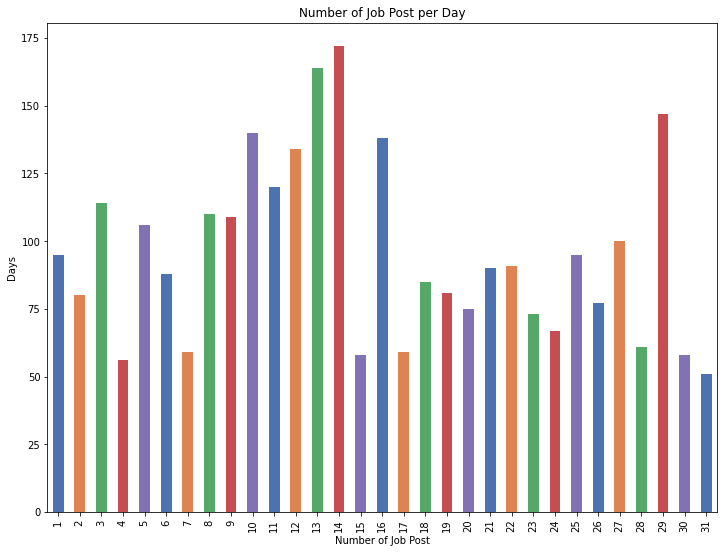

In [ ]:
nyc_jobs.Day.value_counts().sort_index(ascending=True).plot(kind='bar', color=sns.color_palette("deep", 5), figsize=(12, 9))
plt.title("Number of Job Post per Day")
plt.xlabel("Number of Job Post")
plt.ylabel("Days")

Most jobs are posted the second week of the month

Date Analysis

In [ ]:
nyc_jobs['Posting_Year'] = nyc_jobs['Posting_Date'].dt.year
nyc_jobs['Posting_Month'] = nyc_jobs['Posting_Date'].dt.month

In [ ]:
nyc_jobs.head(5)

Job_ID                          Agency  ... Posting_Year  Posting_Month
0   87990    DEPARTMENT OF BUSINESS SERV.  ...         2011              6
1   97899    DEPARTMENT OF BUSINESS SERV.  ...         2012              1
2  102221  DEPT OF ENVIRONMENT PROTECTION  ...         2012              6
3  102221  DEPT OF ENVIRONMENT PROTECTION  ...         2012              6
4  114352  DEPT OF ENVIRONMENT PROTECTION  ...         2012             12

[5 rows x 29 columns]

In [ ]:
year_grouped = nyc_jobs.groupby("Posting_Year") ["Number_Of_Positions"].sum().sort_values(ascending=False)
year_grouped


Posting_Year
2018    4456
2017     680
2016     367
2015      86
2014      58
2013      18
2012       8
2011       1
Name: Number_Of_Positions, dtype: int64

Let's plot this;

In [ ]:
py.iplot([pie_plot(nyc_jobs['Posting_Year'].value_counts(), ['salmon', 'turquoise'], 'Posting_Year')])

As we can see above, most of data belongs to year 2018. 

There is only one job post from year 2011. 

Year between 2011-2015 generates only 3% of total job posts.

It doesn't make sense conduct year comparison and better to remove those year from the model.

In [ ]:
nyc_jobs = nyc_jobs[nyc_jobs.Posting_Year != 2011]
nyc_jobs = nyc_jobs[nyc_jobs.Posting_Year != 2012]
nyc_jobs = nyc_jobs[nyc_jobs.Posting_Year != 2013]
nyc_jobs = nyc_jobs[nyc_jobs.Posting_Year != 2014]
nyc_jobs = nyc_jobs[nyc_jobs.Posting_Year != 2015]

In [ ]:
nyc_jobs.head(5)

Job_ID                          Agency  ... Posting_Year  Posting_Month
5    350278     TAXI & LIMOUSINE COMMISSION  ...         2018              7
10   342355    DEPT OF INFO TECH & TELECOMM  ...         2018              5
23   345905    NYC EMPLOYEES RETIREMENT SYS  ...         2018              5
120  231077  DEPT OF ENVIRONMENT PROTECTION  ...         2016              3
125  231077  DEPT OF ENVIRONMENT PROTECTION  ...         2016              3

[5 rows x 29 columns]

I want to define 4 weeks in a month and 4 quarter in a year.

In [ ]:
nyc_jobs["first_week"] = np.where(nyc_jobs['Day'] < 8, 1, 0)
nyc_jobs["second_week"] = np.where( (nyc_jobs['Day'] > 7) & (nyc_jobs['Day'] < 15 ), 1, 0)
nyc_jobs["third_week"] = np.where( (nyc_jobs["Day"] > 14 ) & (nyc_jobs["Day"] < 22 ), 1, 0)
nyc_jobs["fourth_week"] = np.where(nyc_jobs["Day"] > 21, 1, 0)

In [ ]:
nyc_jobs['Quarter1'] = np.where(nyc_jobs['Month']<=3, 1, 0)
nyc_jobs['Quarter2'] = np.where ( (nyc_jobs['Month'] > 3) & (nyc_jobs['Month'] <= 6 ), 1, 0)
nyc_jobs['Quarter3'] = np.where ( (nyc_jobs['Month'] > 6) & (nyc_jobs['Month'] <= 9 ), 1, 0)
nyc_jobs['Quarter4'] = np.where(nyc_jobs['Month'] > 9, 1, 0)

In [ ]:
nyc_jobs.head(5)

Job_ID                          Agency  ... Quarter3  Quarter4
5    350278     TAXI & LIMOUSINE COMMISSION  ...        1         0
10   342355    DEPT OF INFO TECH & TELECOMM  ...        0         0
23   345905    NYC EMPLOYEES RETIREMENT SYS  ...        0         0
120  231077  DEPT OF ENVIRONMENT PROTECTION  ...        0         0
125  231077  DEPT OF ENVIRONMENT PROTECTION  ...        0         0

[5 rows x 37 columns]

Let's convert Posting_Type into numerical. (1==Internal, 2== External) 

In [ ]:
nyc_jobs['Posting_Type'] = np.where(nyc_jobs['Posting_Type'] == "Internal", 1, 2)

In [ ]:
nyc_jobs.head(5)

Job_ID                          Agency  ...  Quarter3  Quarter4
5    350278     TAXI & LIMOUSINE COMMISSION  ...         1         0
10   342355    DEPT OF INFO TECH & TELECOMM  ...         0         0
23   345905    NYC EMPLOYEES RETIREMENT SYS  ...         0         0
120  231077  DEPT OF ENVIRONMENT PROTECTION  ...         0         0
125  231077  DEPT OF ENVIRONMENT PROTECTION  ...         0         0

[5 rows x 37 columns]

In [ ]:
nyc_jobs.nunique()

Job_ID                           1546
Agency                             49
Posting_Type                        2
Number_Of_Positions                24
Business_Title                   1227
Level                              16
Job_Category                      117
Full_Time_Part_Time_indicator       3
Salary_Range_From                 351
Salary_Range_To                   490
Salary_Frequency                    1
Average_Salary                    700
Salary_Class                        3
Job_Description                  1489
Minimum_Qual_Requirements         332
Preferred_Skills                 1168
Additional_Information            554
To_Apply                         1016
Hours_Shift                       153
Residency_Requirement              55
Posting_Date                      363
Posting_Updated                   332
Salary_Range_Difference           668
Month                              12
Day                                31
NbOfday                             7
Weekday     

In [ ]:
embarked_dummies = pd.get_dummies(nyc_jobs, columns=["Level", "Full_Time_Part_Time_indicator"], prefix=["Level1", "Full-Time_Part-Time_indicator1"])

In [ ]:
nyc_jobs_final = pd.concat([nyc_jobs, embarked_dummies], axis=1)

In [ ]:
nyc_jobs_final.head(5)

Job_ID  ... Full-Time_Part-Time_indicator1_P
5    350278  ...                                0
10   342355  ...                                0
23   345905  ...                                0
120  231077  ...                                0
125  231077  ...                                0

[5 rows x 91 columns]

In [ ]:
nyc_jobs_final.columns

Index(['Job_ID', 'Agency', 'Posting_Type', 'Number_Of_Positions',
       'Business_Title', 'Level', 'Job_Category',
       'Full_Time_Part_Time_indicator', 'Salary_Range_From', 'Salary_Range_To',
       'Salary_Frequency', 'Average_Salary', 'Salary_Class', 'Job_Description',
       'Minimum_Qual_Requirements', 'Preferred_Skills',
       'Additional_Information', 'To_Apply', 'Hours_Shift',
       'Residency_Requirement', 'Posting_Date', 'Posting_Updated',
       'Salary_Range_Difference', 'Month', 'Day', 'NbOfday', 'Weekday',
       'Posting_Year', 'Posting_Month', 'first_week', 'second_week',
       'third_week', 'fourth_week', 'Quarter1', 'Quarter2', 'Quarter3',
       'Quarter4', 'Job_ID', 'Agency', 'Posting_Type', 'Number_Of_Positions',
       'Business_Title', 'Job_Category', 'Salary_Range_From',
       'Salary_Range_To', 'Salary_Frequency', 'Average_Salary', 'Salary_Class',
       'Job_Description', 'Minimum_Qual_Requirements', 'Preferred_Skills',
       'Additional_Information', 

In [ ]:
nyc_jobs_final = nyc_jobs_final.loc[:,~nyc_jobs_final.columns.duplicated()]

In [ ]:
nyc_jobs_final.Business_Title.value_counts()

Project Manager                                                  28
Confidential Investigator                                        24
Public Health Inspector, Food Safety and Community Sanitation    20
Assistant Corporation Counsel                                    20
Community Coordinator                                            14
                                                                 ..
Project Development Coordinator for Brooklyn Operations           1
Bike Share - City Planner II                                      1
Engineering Audit Analyst                                         1
THE LAND USE ANALYST                                              1
Associate Water Use Inspector II- Brooklyn                        1
Name: Business_Title, Length: 1227, dtype: int64

In [ ]:
nyc_jobs_final.head(5)

Job_ID  ... Full-Time_Part-Time_indicator1_P
5    350278  ...                                0
10   342355  ...                                0
23   345905  ...                                0
120  231077  ...                                0
125  231077  ...                                0

[5 rows x 56 columns]

**^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^**

**UNSUPERVISED LEARNING**

In this section, you will find Unsupervised Learning side of project.

As a brief summary of section;

Target variable choosen as Salary Class.

Correlation between Salary Class and other variables searched and tried to  find the best model that predicts the number of cluster.

Worked with different models. 

Different metrics used to compare models.



Let's start with modifying the data by selecting the features to move with

In [ ]:
nyc_last = nyc_jobs_final.filter(['Posting_Type', 'Number_Of_Positions', 'Salary_Range_From', 'Salary_Range_To', 'Salary_Range_Difference', 'Average_Salary', 'Salary_Class', 
                                  'Month', 'Day', 'NbOfday''first_week', 'second_week', 'third_week',
       'fourth_week', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4''Level1_0', 'Level1_1', 'Level1_2', 'Level1_3', 'Level1_3A', 'Level1_4',
       'Level1_4A', 'Level1_4B', 'Level1_M1', 'Level1_M2', 'Level1_M3',
       'Level1_M4', 'Level1_M5', 'Level1_M6', 'Level1_M7', 'Level1_MY',
       'Full-Time_Part-Time_indicator1_ ', 'Full-Time_Part-Time_indicator1_F',
       'Full_Time_Part_Time_indicator1_P',
       'Salary_Frequency1_Daily', 'Salary_Frequency1_Hourly'], axis=1)

In [ ]:
nyc_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 5 to 3419
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Posting_Type                      2831 non-null   int64  
 1   Number_Of_Positions               2831 non-null   int64  
 2   Salary_Range_From                 2831 non-null   int64  
 3   Salary_Range_To                   2831 non-null   int64  
 4   Salary_Range_Difference           2831 non-null   float64
 5   Average_Salary                    2831 non-null   float64
 6   Salary_Class                      2831 non-null   int64  
 7   Month                             2831 non-null   int64  
 8   Day                               2831 non-null   int64  
 9   second_week                       2831 non-null   int64  
 10  third_week                        2831 non-null   int64  
 11  fourth_week                       2831 non-null   int64  
 12  Quarte

In [ ]:
nyc_last.head()

Posting_Type  ...  Full-Time_Part-Time_indicator1_F
5               2  ...                                 1
10              2  ...                                 0
23              1  ...                                 1
120             2  ...                                 1
125             1  ...                                 1

[5 rows x 31 columns]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [ ]:
 X = nyc_last

In [ ]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Reduce dimensionality and apply PCA;
X_pca = PCA(2).fit_transform(X_std)

**K-Means Clustering**

In [ ]:
# Calculate predicted values;
y_pred = KMeans(n_clusters=3, random_state=123).fit_predict(X_pca)

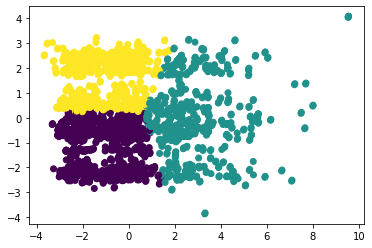

In [ ]:
# Plot the data;
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

K-means clustering reveals 3 groups clearly

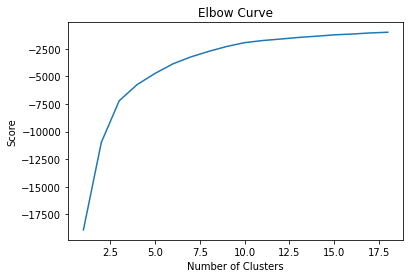

In [ ]:
Nc = range(1, 19)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X_pca).score(X_pca) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Elbow curve shows that 3 cluster is the best choice.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)

In [ ]:
X['cluster'] = kmeans.labels_

Let's see each cluster's mean

In [ ]:
X.groupby("cluster").mean()

Posting_Type  ...  Full-Time_Part-Time_indicator1_F
cluster                ...                                  
0               1.461  ...                             0.937
1               1.467  ...                             0.900
2               1.444  ...                             0.902

[3 rows x 31 columns]

Let's see how many value in each cluster

In [ ]:
X.groupby("cluster").count()

Posting_Type  ...  Full-Time_Part-Time_indicator1_F
cluster                ...                                  
0                 887  ...                               887
1                 722  ...                               722
2                1222  ...                              1222

[3 rows x 31 columns]

Let's check Cluster 1 

In [ ]:
X[X.cluster == 1].head(10)

Posting_Type  ...  cluster
23              1  ...        1
153             1  ...        1
154             2  ...        1
155             1  ...        1
162             1  ...        1
163             2  ...        1
171             2  ...        1
172             1  ...        1
174             1  ...        1
175             2  ...        1

[10 rows x 32 columns]

Let's compare the clusters in terms of each core variables;

Text(0.5, 1.0, 'Salary_Range_From Clustering Plot')

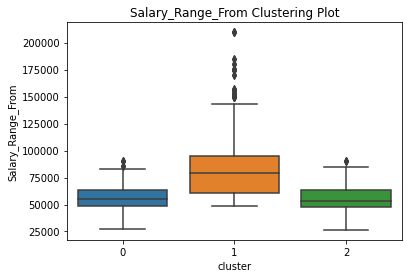

In [ ]:
ax=sns.boxplot(X.cluster,X.Salary_Range_From)
ax.set_title("Salary_Range_From Clustering Plot")

Text(0.5, 1.0, 'Salary_Range_To Clustering Plot')

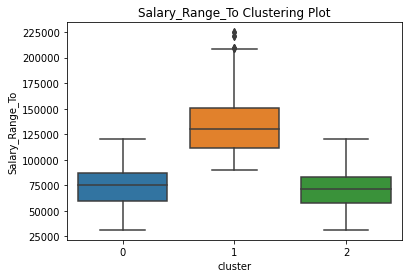

In [ ]:
ax=sns.boxplot(X.cluster,X.Salary_Range_To)
ax.set_title("Salary_Range_To Clustering Plot")

Text(0.5, 1.0, 'Salary_Range_Diffrence Clustering Plot')

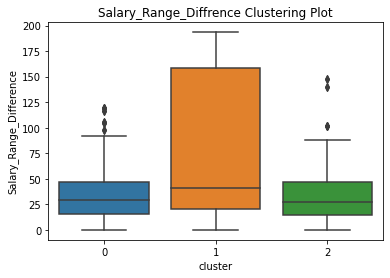

In [ ]:
ax=sns.boxplot(X.cluster,X.Salary_Range_Difference)
ax.set_title("Salary_Range_Diffrence Clustering Plot")

Text(0.5, 1.0, 'Number_Of_Positions Clustering Plot')

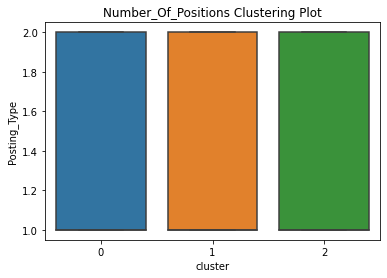

In [ ]:
ax=sns.boxplot(X.cluster,X.Posting_Type)
ax.set_title("Number_Of_Positions Clustering Plot")

Text(0.5, 1.0, 'Number_Of_Positions Clustering Plot')

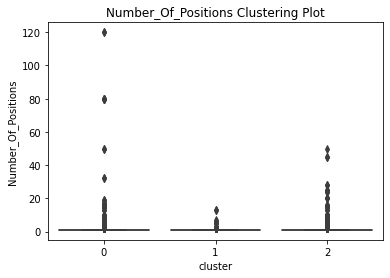

In [ ]:
ax=sns.boxplot(X.cluster,X.Number_Of_Positions)
ax.set_title("Number_Of_Positions Clustering Plot")

Let's see which cluster is hired on which month?

Text(0.5, 1.0, 'Month Clustering Plot')

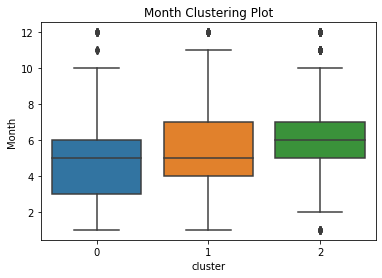

In [ ]:
ax=sns.boxplot(X.cluster,X.Month)
ax.set_title("Month Clustering Plot")

In [ ]:
import sklearn.metrics as metrics

In [ ]:
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_pca)
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_pca, pred_3, metric='euclidean')))

pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_pca)
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X_pca, pred_4, metric='euclidean')))

pred_5 = KMeans(n_clusters=5, random_state=123).fit_predict(X_pca)
print("Silhouette score for five cluster k-means: {}".format(
    metrics.silhouette_score(X_pca, pred_5, metric='euclidean')))

Silhouette score for three cluster k-means: 0.3869560879012285
Silhouette score for four cluster k-means: 0.36564599110354323
Silhouette score for five cluster k-means: 0.3740718701175936


Silhuette scores are very close. The highest one is belong to 3 cluster. This supports our 3 cluster choice.

Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linkage_methods = ["ward", "average", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_pca)

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_pca)

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='euclidean',
                                      n_clusters=3)
# Fit model
clusters = agg_cluster.fit_predict(X_pca)

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

Silhouette score of linkage method ward: 0.3803312396798466
------------------------------------------------
Silhouette score of linkage method average: 0.5176829434620289
------------------------------------------------
Silhouette score of linkage method complete: 0.42171706850333673


Silhouette method average reveals the best result.

Let's check what Dendrogram says.

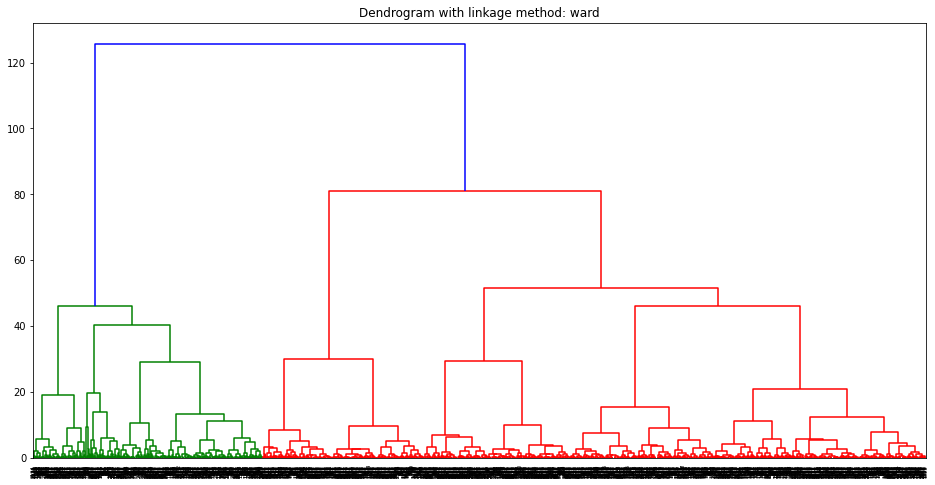

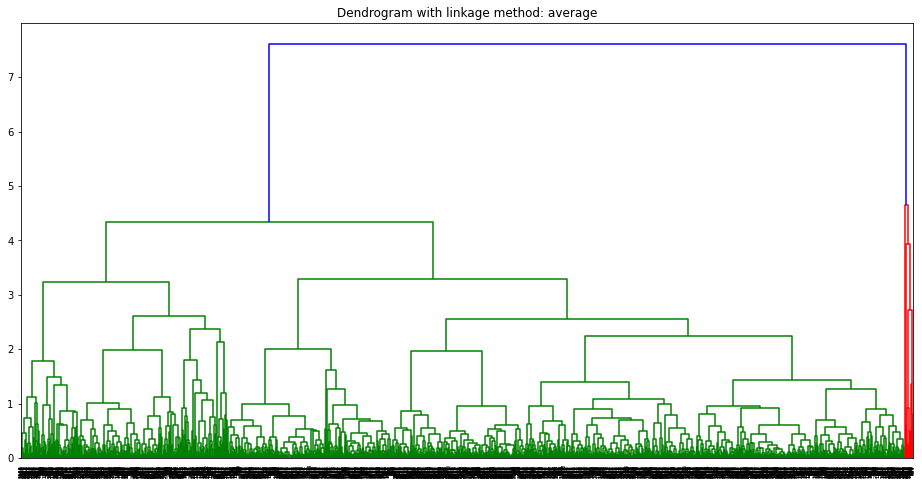

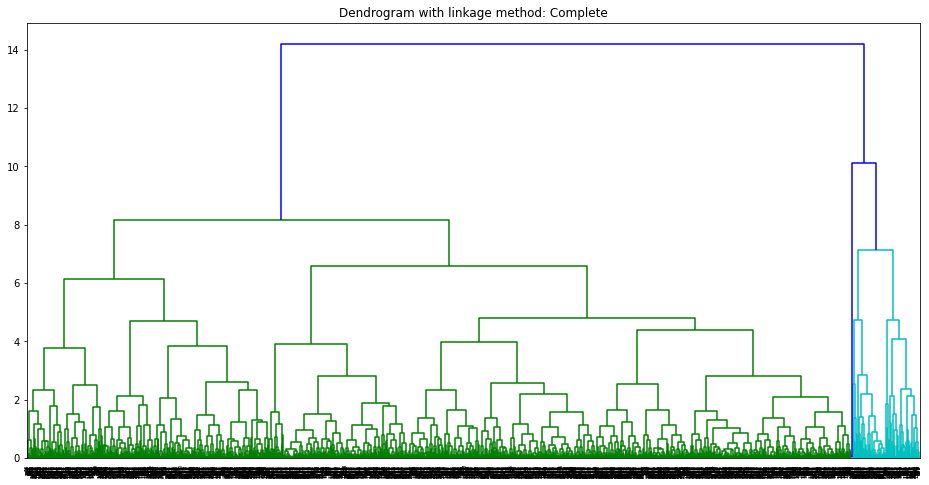

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Dendrogram with linkage method: ward")
dendrogram(linkage(X_pca, method='ward'))
plt.show()

plt.figure(figsize=(16,8))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_pca, method='average'))
plt.show()

plt.figure(figsize=(16,8))
plt.title("Dendrogram with linkage method: Complete")
dendrogram(linkage(X_pca, method='complete'))
plt.show()

Actually, Dendrogram says something different that is best visual comes from method ward as in usual.

DBSCAN Approach

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=3)

# Fit model
clusters = dbscan_cluster.fit_predict(X_pca)

In [ ]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.358552106357433


In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=3, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_pca)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_pca)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 4
Number of clusters when min_samples=2 is: 4
Number of clusters when min_samples=3 is: 4
Number of clusters when min_samples=4 is: 4
Number of clusters when min_samples=5 is: 3
Number of clusters when min_samples=6 is: 3
Number of clusters when min_samples=7 is: 3
Number of clusters when min_samples=8 is: 3
Number of clusters when min_samples=9 is: 2
Number of clusters when min_samples=10 is: 2
Number of clusters when min_samples=11 is: 2
Number of clusters when min_samples=12 is: 2
Number of clusters when min_samples=13 is: 2
Number of clusters when min_samples=14 is: 2
Number of clusters when min_samples=15 is: 2
Number of clusters when min_samples=16 is: 2
Number of clusters when min_samples=17 is: 2
Number of clusters when min_samples=18 is: 2
Number of clusters when min_samples=19 is: 2
Number of clusters when min_samples=20 is: 2
Number of clusters when min_samples=21 is: 2
Number of clusters when min_samples=22 is: 2
Number of clusters 

As the min_samples increases, number of clusters decreases. As of min_samples=9, number of cluster is always 2.



In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=3, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_pca)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=3, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_pca)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 4
Number of clusters when eps=0.01 is: 36
Number of clusters when eps=0.1 is: 193
Number of clusters when eps=1 is: 4
Number of clusters when eps=2 is: 2
Number of clusters when eps=3 is: 2
Number of clusters when eps=4 is: 1
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1


Number of cluster decreases when eps increases.

In [ ]:
y_pred = DBSCAN(eps=1, min_samples=3, metric="euclidean").fit_predict(X_pca)

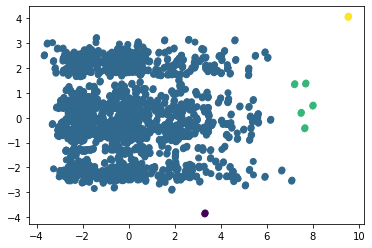

In [ ]:
# Plot the data;
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

It is unfortunately not revealing right number of cluster whixh is typical for DBSCAN Approach.

Gaussian Mixture Model

In [ ]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)

In [ ]:
# Defining the clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("-------------------")

# Defining the clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("-------------------")

# Defining the clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)


print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("-------------------")


# Defining the clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)


print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

Silhouette score with covariance_type=full: 0.38950001181669797
-------------------
Silhouette score with covariance_type=tied: 0.3724484652003325
-------------------
Silhouette score with covariance_type=diag: 0.3881335103963516
-------------------
Silhouette score with covariance_type=spherical: 0.38588462377124844


Silhouette scores are almost at the same level.

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="full")

# Fit model
y_pred = gmm_cluster.fit_predict(X_pca)


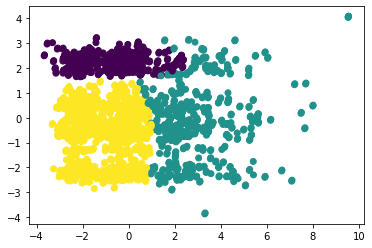

In [ ]:
# Plot the data;
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

Gaussian Mixture model reveals almost same visual as K-Means model. 

**Dimensionaity Reduction Techniques**

T-SNE

In [ ]:
from sklearn.manifold import TSNE
import time

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=300)
tsne_results = tsne.fit_transform(X_pca)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 2831 samples in 0.002s...
[t-SNE] Computed neighbors for 2831 samples in 0.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2831
[t-SNE] Computed conditional probabilities for sample 2000 / 2831
[t-SNE] Computed conditional probabilities for sample 2831 / 2831
[t-SNE] Mean sigma: 0.304353
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.624630
[t-SNE] KL divergence after 300 iterations: 0.438309
t-SNE done! Time elapsed: 23.73921823501587 seconds


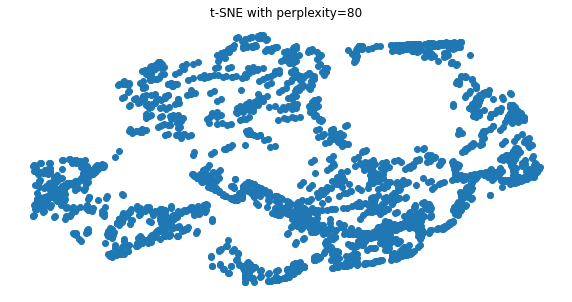

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title("t-SNE with perplexity=80")
plt.show()

Let's check perplexity= 100 scenario

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2831 samples in 0.001s...
[t-SNE] Computed neighbors for 2831 samples in 0.193s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2831
[t-SNE] Computed conditional probabilities for sample 2000 / 2831
[t-SNE] Computed conditional probabilities for sample 2831 / 2831
[t-SNE] Mean sigma: 0.349854
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.883034
[t-SNE] KL divergence after 300 iterations: 0.377505


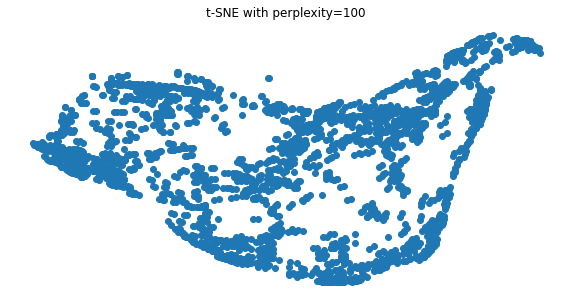

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(X_pca)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=100")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 2831 samples in 0.001s...
[t-SNE] Computed neighbors for 2831 samples in 0.416s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2831
[t-SNE] Computed conditional probabilities for sample 2000 / 2831
[t-SNE] Computed conditional probabilities for sample 2831 / 2831
[t-SNE] Mean sigma: 0.545246
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.167213
[t-SNE] KL divergence after 500 iterations: 0.209648


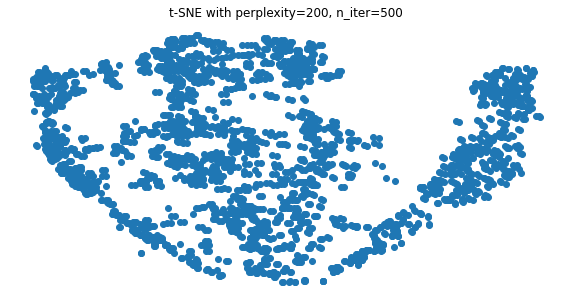

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=200, n_iter=500)
tsne_results = tsne.fit_transform(X_pca)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=200, n_iter=500")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we increased the perplexity, grouping becomes more apparent.

UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_pca)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 15.948807716369629 seconds


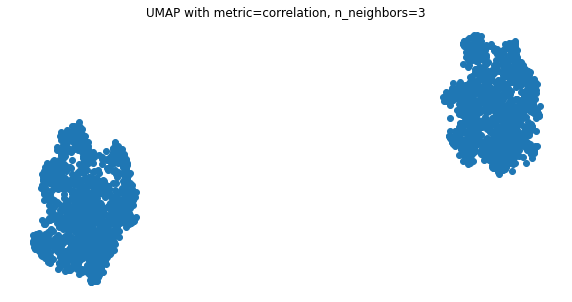

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title("UMAP with metric=correlation, n_neighbors=3")
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='euclidean').fit_transform(X_pca)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 9.947626113891602 seconds


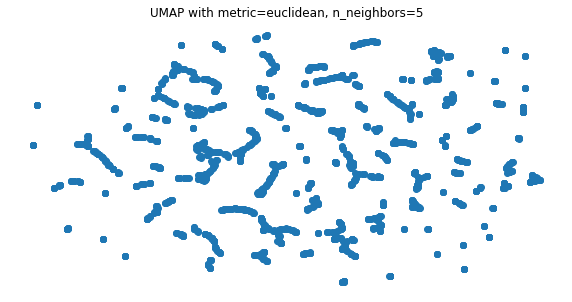

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title("UMAP with metric=euclidean, n_neighbors=5")
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=2,
                      min_dist=0.1,
                      metric='cosine').fit_transform(X_pca)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 9.432453632354736 seconds


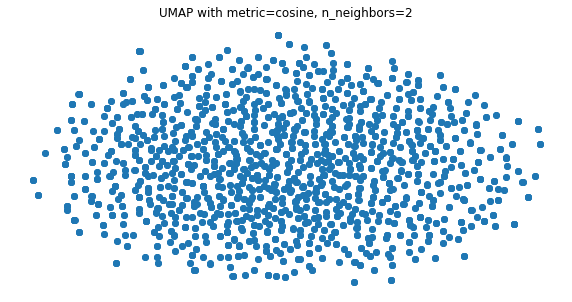

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title("UMAP with metric=cosine, n_neighbors=2")
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.1,
                      metric='hamming').fit_transform(X_pca)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 9.21192216873169 seconds


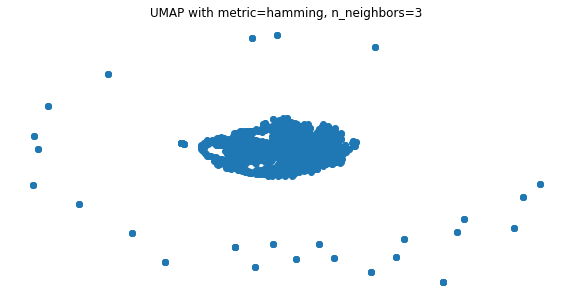

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title("UMAP with metric=hamming, n_neighbors=3")
plt.axis('off')
plt.show()

Dimensionality Reduciton is the process of reducing the number of random variables under consideration.

In my case, none of the dimensionality reduction methods succeded to create the right number of cluster.

**As a conclusion of Unsupervised Learning;**

Every single method have same pros and cons. Data quality, number of sample, size of data effect the overall performance of the models.

Based on the given conditions, none of the models I worked with performed very well actually. However I chose K-mean to move forward due to it's some advantages like; it scales to large dataset, it guarantees convergence, it also generalizes to clusters of different shapes and sizes, such as elliptical clusters. K mean is also relatively simple to implement which saves time.

Dimensionality Reduction techniques also couldn't reveal very well results which represents that data is very disconnected and scattered throughout the space.

**^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^**

**NLP**

In this section, you will find NLP side of project.

As a brief summary of section;

Created textual column combining with some columns related to job posting. (Description, Requirements and Preferred Skills)

Cleaned new data

Target variable choosen as Salary Class.

Correlation between Salary Class and text searched and tried to create best model to predict Salary Class. Worked with different models.

Some feature generation methods used (BoW, N-grams, Tf-Idf)

Different data exploration techniques used. (WordCloud, Unigram, Bigram, Trigram Analysis)

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")
from collections import Counter
import nltk
import spacy
import re

In [ ]:
nyc_jobs_final.head(5)

Job_ID  ... Full-Time_Part-Time_indicator1_P
5    350278  ...                                0
10   342355  ...                                0
23   345905  ...                                0
120  231077  ...                                0
125  231077  ...                                0

[5 rows x 56 columns]

Let's select features for NLP models which should be text.

In [ ]:
nyc_jobs_nlp = nyc_jobs_final.filter(['Job_Description', 'Minimum_Qual_Requirements', 
                                      'Preferred_Skills', 'Salary_Class'], axis=1) 

In [ ]:
nyc_jobs_nlp.head()

Job_Description  ... Salary_Class
5    The New York City Taxi and Limousine Commissio...  ...            2
10   DoITT provides for the sustained, efficient an...  ...            2
23   NYCERS seeks to hire a Senior Project Manager ...  ...            3
120  The NYC Department of Environmental Protection...  ...            2
125  The NYC Department of Environmental Protection...  ...            2

[5 rows x 4 columns]

Now, I will combine Business Title, Job Description, Minimum Qual Requirements and Preferred Skills. I think those columns will provide enough text to run NLP models.

In [ ]:
nyc_jobs_nlp['text'] = nyc_jobs_nlp['Job_Description'] + " " + nyc_jobs_nlp['Minimum_Qual_Requirements'] + " " + nyc_jobs_nlp['Preferred_Skills']
del nyc_jobs_nlp['Job_Description']
del nyc_jobs_nlp['Minimum_Qual_Requirements']
del nyc_jobs_nlp['Preferred_Skills']

In [ ]:
nyc_jobs_nlp.head(5)

Salary_Class                                               text
5               2  The New York City Taxi and Limousine Commissio...
10              2  DoITT provides for the sustained, efficient an...
23              3  NYCERS seeks to hire a Senior Project Manager ...
120             2  The NYC Department of Environmental Protection...
125             2  The NYC Department of Environmental Protection...

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('stopwords')
from collections import Counter
import nltk
import spacy
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nlp = spacy.load('en')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Let's start to cleaning our data.

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
#Removing the square brackets
def remove_between_square_brackets(text):
    #return re.sub('\[[^]]*\]', '', text)
    return re.sub(r'[()]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    #text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
nyc_jobs_nlp['text']=nyc_jobs_nlp['text'].apply(denoise_text)

In [ ]:
nyc_jobs_nlp["text"].head(10)

5      New York City Taxi Limousine Commission (TLC) ...
10     DoITT provides sustained, efficient effective ...
23     NYCERS seeks hire Senior Project Manager super...
120    NYC Department Environmental Protection (DEP) ...
125    NYC Department Environmental Protection (DEP) ...
130    Bureauof Veterinary Pest Control Services, pro...
135    NYC Department Environmental Protection (DEP) ...
147    New York City Department Environmental Protect...
148    New York City Department Environmental Protect...
149    ACS establishing new case consultation functio...
Name: text, dtype: object

In [ ]:
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.lower()

In [ ]:
nyc_jobs_nlp["text"].head(5)

5      new york city taxi limousine commission (tlc) ...
10     doitt provides sustained, efficient effective ...
23     nycers seeks hire senior project manager super...
120    nyc department environmental protection (dep) ...
125    nyc department environmental protection (dep) ...
Name: text, dtype: object

In [ ]:
# utility function for standard text cleaning
def text_cleaner(text):
    # visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  better get rid of it now!
    text = re.sub(',',' ',text)
    text = re.sub("(\().*?(\))", '', text)
    text = re.sub(r'\([^()]*\)', '', text)
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r"(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b", " ", text)
    text = re.sub(r'[()]', '', text)
    text = ' '.join(text.split())
    text = text_cleaner
    return text

In [ ]:
nyc_jobs_nlp["text"].head(10)

5      new york city taxi limousine commission (tlc) ...
10     doitt provides sustained, efficient effective ...
23     nycers seeks hire senior project manager super...
120    nyc department environmental protection (dep) ...
125    nyc department environmental protection (dep) ...
130    bureauof veterinary pest control services, pro...
135    nyc department environmental protection (dep) ...
147    new york city department environmental protect...
148    new york city department environmental protect...
149    acs establishing new case consultation functio...
Name: text, dtype: object

In [ ]:
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.replace('(','').replace(')','')

In [ ]:
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace(",", "")
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace("¢", "")
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace("â", "")
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace("€", "")
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace("&", "")
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace("™", "")
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace("“", "")
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace("/", "")
nyc_jobs_nlp["text"] = nyc_jobs_nlp.text.str.replace(":", "")

In [ ]:
nyc_jobs_nlp["text"].head(10)

5      new york city taxi limousine commission (tlc) ...
10     doitt provides sustained efficient effective d...
23     nycers seeks hire senior project manager super...
120    nyc department environmental protection (dep) ...
125    nyc department environmental protection (dep) ...
130    bureauof veterinary pest control services prom...
135    nyc department environmental protection (dep) ...
147    new york city department environmental protect...
148    new york city department environmental protect...
149    acs establishing new case consultation functio...
Name: text, dtype: object

Looks like I still have parantheses in my text. Let's remove them.

In [ ]:
nyc_jobs_nlp["text"] = nyc_jobs_nlp["text"].str.replace("(", "")

In [ ]:
nyc_jobs_nlp["text"] = nyc_jobs_nlp["text"].str.replace(")", "")

In [ ]:
nyc_jobs_nlp["text"].head(10)

5      new york city taxi limousine commission tlc na...
10     doitt provides sustained efficient effective d...
23     nycers seeks hire senior project manager super...
120    nyc department environmental protection dep pr...
125    nyc department environmental protection dep pr...
130    bureauof veterinary pest control services prom...
135    nyc department environmental protection dep pr...
147    new york city department environmental protect...
148    new york city department environmental protect...
149    acs establishing new case consultation functio...
Name: text, dtype: object

Everything looks fine now.

In [ ]:
print (stop)
print(punctuation)

{'its', '!', '=', 'me', 'by', 'but', '`', 'myself', 'hasn', "won't", 's', 'any', 'or', "she's", 'wasn', '(', 'our', 'them', 'who', 'what', 'from', 'don', 'we', 'too', 'doing', "doesn't", "shouldn't", 'why', ':', 'than', 'their', 'to', 'while', '~', 'she', '^', 'which', 'was', 'through', '-', '[', 'under', 're', "shan't", '+', 'his', 'having', 'be', 'about', 'then', "don't", 'shouldn', 'once', 'against', 'haven', 'm', '$', 'during', 'i', 'yourself', '}', 'yourselves', "it's", 'above', 've', '_', "you're", 'off', 'ourselves', 'aren', 'both', 'hers', 'after', '%', 'himself', 'were', 'should', 'on', 'own', 'now', '/', 'out', 'they', 'other', 'can', 'where', 'my', 'how', 'up', 'further', "haven't", 'no', 'some', 'themselves', 'had', 'isn', 'it', 'very', "should've", 'here', 'just', '"', 'as', 'the', 'with', 'shan', 'such', "you'd", '<', 'her', 'for', 'he', 'when', "mightn't", 'until', 'been', 'before', 'ma', 'ours', 'theirs', 'at', "aren't", '?', 'that', '\\', '*', 'over', 'same', 'needn', 

Now I will try different feature generation methods with different parameters starting with BoW.

**Bag of Words**

In [ ]:
nyc_jobs_nlp = nyc_jobs_nlp.dropna() 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', min_df=5)
X = vectorizer.fit_transform(nyc_jobs_nlp["text"])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
sentences = pd.concat([bow_df, nyc_jobs_nlp[["text", "Salary_Class"]]], axis=1)


#X = vectorizer.fit_transform(sentences["text"]) bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()) sentences = pd.concat([bow_df, sentences[["text", "author"]]], axis=1)

In [ ]:
 sentences = sentences.dropna()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Y = sentences["Salary_Class"]
X = np.array(sentences.drop(['text','Salary_Class'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.8837375178316691

Test set score: 0.5064102564102564
----------------------Random Forest Scores----------------------
Training set score: 0.8865905848787446

Test set score: 0.5470085470085471
----------------------Gradient Boosting Scores----------------------
Training set score: 0.7774607703281027

Test set score: 0.5149572649572649


Looks like, all models have serious overfitting problem.  Overfitting is a known problem when using bag of words, since it involves throwing a massive number of features at a model.

**N-Grams**

In [ ]:
nyc_jobs_nlp = nyc_jobs_nlp.reset_index()

In [ ]:
# we'll use 2-grams
vectorizer = CountVectorizer(analyzer='word', min_df=5, ngram_range=(2,2))
X = vectorizer.fit_transform(nyc_jobs_nlp["text"])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
sentences = pd.concat([bow_df, nyc_jobs_nlp[["text", "Salary_Class"]]], axis=1)
sentences.head()

00 flat  ...  Salary_Class
0        0  ...             2
1        0  ...             2
2        0  ...             3
3        0  ...             2
4        0  ...             2

[5 rows x 31745 columns]

In [ ]:
Y = sentences['Salary_Class']
X = np.array(sentences.drop(['text','Salary_Class'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.9964664310954063

Test set score: 0.884377758164166
----------------------Random Forest Scores----------------------
Training set score: 0.9964664310954063

Test set score: 0.8905560458958517
----------------------Gradient Boosting Scores----------------------
Training set score: 0.9452296819787986

Test set score: 0.8305383936451898


Looks like each model is overfitting.

Let's check ngram (1, 2) scenario

In [ ]:
# we'll use 2-grams
vectorizer = CountVectorizer(analyzer='word', min_df=5, ngram_range=(1,2))
X = vectorizer.fit_transform(nyc_jobs_nlp["text"])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
sentences = pd.concat([bow_df, nyc_jobs_nlp[["text", "Salary_Class"]]], axis=1)
sentences.head()

00  00 flat  ...                                               text  Salary_Class
0   0        0  ...  new york city taxi limousine commission tlc na...             2
1   0        0  ...  doitt provides sustained efficient effective d...             2
2   0        0  ...  nycers seeks hire senior project manager super...             3
3   0        0  ...  nyc department environmental protection dep pr...             2
4   0        0  ...  nyc department environmental protection dep pr...             2

[5 rows x 38577 columns]

In [ ]:
Y = sentences['Salary_Class']
X = np.array(sentences.drop(['text','Salary_Class'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.9964664310954063

Test set score: 0.8684907325684025
----------------------Random Forest Scores----------------------
Training set score: 0.9964664310954063

Test set score: 0.8781994704324801
----------------------Gradient Boosting Scores----------------------
Training set score: 0.9699646643109541

Test set score: 0.8658428949691086


Logistic Regression and Random Forest scores were better in n-gram_range(2,2) scenario while Gradient Boosting is performing better in n-gram_range(1,2)

**Tf-idf**

Now, I will use;

max_df=0.5 (drops words that occur in more than half the documents) and 

min_df=2 (this makes the vectorizer only use words that appear at least twice) functions and 

norm=u'l2' as a correction factor.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5, min_df=2, use_idf=True, norm=u'l2', smooth_idf=True)


# applying the vectorizer
X = vectorizer.fit_transform(nyc_jobs_nlp["text"])

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
sentences = pd.concat([tfidf_df, nyc_jobs_nlp[["text", "Salary_Class"]]], axis=1)

# keep in mind that the log base 2 of 1 is 0,
# so a tf-idf score of 0 indicates that the word was present once in that sentence.
sentences.head()

00  0000  ...                                               text  Salary_Class
0 0.000 0.000  ...  new york city taxi limousine commission tlc na...             2
1 0.000 0.000  ...  doitt provides sustained efficient effective d...             2
2 0.000 0.000  ...  nycers seeks hire senior project manager super...             3
3 0.000 0.000  ...  nyc department environmental protection dep pr...             2
4 0.000 0.000  ...  nyc department environmental protection dep pr...             2

[5 rows x 12302 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Y = sentences['Salary_Class']
X = np.array(sentences.drop(['text','Salary_Class'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.9210836277974087

Test set score: 0.7837599293909974
----------------------Random Forest Scores----------------------
Training set score: 0.9964664310954063

Test set score: 0.8596646072374228
----------------------Gradient Boosting Scores----------------------
Training set score: 0.9793875147232037

Test set score: 0.8340688437775816


As we can see, compared to the BoW scores, our scores are better. However, when we compare them to N-grams, they all are lower. We also still have overfittinf problem.

We can add n-gram parameter to tf-idf as well. Let's now change ngram_range parameter and try (2,2).

In [ ]:
vectorizer = TfidfVectorizer(
     min_df=5, use_idf=True, norm=u'l2', smooth_idf=True, ngram_range=(2,2))


# applying the vectorizer
X = vectorizer.fit_transform(nyc_jobs_nlp["text"])

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
sentences = pd.concat([tfidf_df, nyc_jobs_nlp[["text", "Salary_Class"]]], axis=1)

# keep in mind that the log base 2 of 1 is 0,
# so a tf-idf score of 0 indicates that the word was present once in that sentence.
sentences.head()

00 flat  ...  Salary_Class
0    0.000  ...             2
1    0.000  ...             2
2    0.000  ...             3
3    0.000  ...             2
4    0.000  ...             2

[5 rows x 31745 columns]

In [ ]:
 sentences = sentences.dropna()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Y = sentences['Salary_Class']
X = np.array(sentences.drop(['text','Salary_Class'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.9316843345111896

Test set score: 0.8084730803177406
----------------------Random Forest Scores----------------------
Training set score: 0.9964664310954063

Test set score: 0.8905560458958517
----------------------Gradient Boosting Scores----------------------
Training set score: 0.9634864546525324

Test set score: 0.8278905560458959


All the scores decreased when I changed n-gram_range parameter to (2,2)

Latent Semantic Analysis

In [ ]:
X_train, X_test = train_test_split(X, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=5, # drop words that occur in more than half the paragraphs
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
X = vectorizer.fit_transform(nyc_jobs_nlp["text"])
print("Number of features: %d" % X.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(X, test_size=0.4, random_state=0)

#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

**Word2Vec Vectorization Method**

In [ ]:
import gensim

In [ ]:
# train word2vec on the the sentences
model = gensim.models.Word2Vec(
    sentences["text"],
    workers=4,
    min_count=1,
    window=6,
    sg=0,
    sample=1e-3,
    size=300,
    hs=1
)

Now, let's create our numerical features using the word2vec representations of the words. In our final dataset we'll have 300 numerical features.

In [ ]:
word2vec_arr = np.zeros((sentences.shape[0],300))

for i, sentence in enumerate(sentences["text"]):
    word2vec_arr[i,:] = np.mean([model[lemma] for lemma in sentence], axis=0)

word2vec_arr = pd.DataFrame(word2vec_arr)
sentences = pd.concat([sentences[["Salary_Class", "text"]],word2vec_arr], axis=1)
sentences.dropna(inplace=True)

sentences.head()

Salary_Class  text  ...    298   299
0             2     0  ... -0.000 0.000
1             2     0  ... -0.000 0.000
2             3     0  ...  0.000 0.000
3             2     0  ...  0.000 0.000
4             2     0  ...  0.000 0.000

[5 rows x 303 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Y = sentences['Salary_Class']
X = np.array(sentences.drop(['text','Salary_Class'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.4652532391048292

Test set score: 0.45189761694616065
----------------------Random Forest Scores----------------------
Training set score: 0.4652532391048292

Test set score: 0.45189761694616065
----------------------Gradient Boosting Scores----------------------
Training set score: 0.4652532391048292

Test set score: 0.45189761694616065


The scores aren't great compared to the scores of the previous models. The main reason is the small size of our corpus. Now, let's increase the size of corpus and try again;

In [ ]:
# train word2vec on the the sentences
model = gensim.models.Word2Vec(
    sentences["text"],
    workers=4,
    min_count=1,
    window=6,
    sg=0,
    sample=1e-3,
    size=1000,
    hs=1
)

In [ ]:
word2vec_arr = np.zeros((sentences.shape[0],1000))

for i, sentence in enumerate(sentences["text"]):
    word2vec_arr[i,:] = np.mean([model[lemma] for lemma in sentence], axis=0)

word2vec_arr = pd.DataFrame(word2vec_arr)
sentences = pd.concat([sentences[["Salary_Class", "text"]],word2vec_arr], axis=1)
sentences.dropna(inplace=True)

sentences.head()

Salary_Class  text  ...    998   999
0             2     0  ... -0.000 0.000
1             2     0  ... -0.000 0.000
2             3     0  ...  0.000 0.000
3             2     0  ...  0.000 0.000
4             2     0  ...  0.000 0.000

[5 rows x 1003 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Y = sentences['Salary_Class']
X = np.array(sentences.drop(['text','Salary_Class'], 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

# Models
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.4652532391048292

Test set score: 0.45189761694616065
----------------------Random Forest Scores----------------------
Training set score: 0.4652532391048292

Test set score: 0.45189761694616065
----------------------Gradient Boosting Scores----------------------
Training set score: 0.4652532391048292

Test set score: 0.45189761694616065


When I increased the size of the faeture to 1000, scores didn't increase. It would be better to try this with larger size like 10.000. ( Here because of the memory usage problem, I didn't apply) 

**Recall, Precision, F1 Scores**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=82)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
print(y_test)

1735    1
646     2
268     3
838     2
992     2
       ..
1026    1
2043    2
1756    1
1019    2
69      1
Name: Salary_Class, Length: 708, dtype: int64


In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
fbeta_precision = fbeta_score(y_test, predictions,  0.5, average='weighted')
fbeta_recall = fbeta_score(y_test, predictions, 2, average='weighted')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.44
Precision score: 0.20
Recall score: 0.44
F1 score: 0.27
Fbeta score favoring precision: 0.22
FBeta score favoring recall: 0.35


In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
fbeta_precision = fbeta_score(y_test, predictions,  0.5, average='weighted')
fbeta_recall = fbeta_score(y_test, predictions, 2, average='weighted')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.44
Precision score: 0.20
Recall score: 0.44
F1 score: 0.27
Fbeta score favoring precision: 0.22
FBeta score favoring recall: 0.35


In [ ]:
predictions = gbc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
fbeta_precision = fbeta_score(y_test, predictions,  0.5, average='weighted')
fbeta_recall = fbeta_score(y_test, predictions, 2, average='weighted')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.44
Precision score: 0.20
Recall score: 0.44
F1 score: 0.27
Fbeta score favoring precision: 0.22
FBeta score favoring recall: 0.35


As we may see above, we don't have red plot which means we don't have negative class. There are positive instances on both sides of the threshold. That means that all positive instances on the left of the threshold will be incorrectly classified as negative giving false negatives. It is not so good as we have too much predictions on the left side of the blue threshold line that lower than 0.50

**Cross Validation Scores**



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, Y, cv=5)

array([0.46031746, 0.46113074, 0.45936396, 0.45936396, 0.45936396])

In [ ]:
cv_score=cross_val_score(lr, X, Y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.45990801503168993
0.000714241174703311


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X, Y, cv=5)

array([0.46031746, 0.46113074, 0.45936396, 0.45936396, 0.45936396])

In [ ]:
cv_score=cross_val_score(rfc, X, Y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.45990801503168993
0.000714241174703311


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(gbc, X, Y, cv=5)

array([0.46031746, 0.46113074, 0.45936396, 0.45936396, 0.45936396])

In [ ]:
cv_score=cross_val_score(gbc, X, Y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.45990801503168993
0.000714241174703311


**WorldCloud**

Let's check general looking of WolrCloud regardless of Salary Class

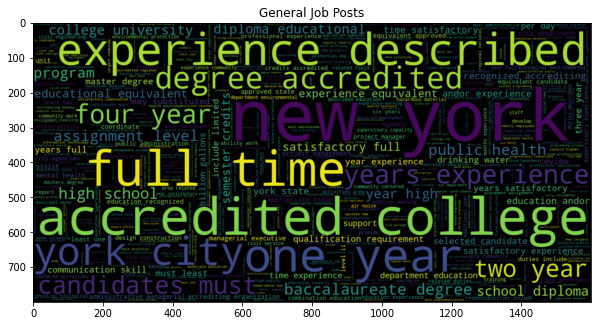

In [ ]:
plt.figure(figsize = (10,12))
plt.title("General Job Posts")
wc = WordCloud(max_words = 500 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(nyc_jobs_nlp.text))
plt.imshow(wc , interpolation = 'bilinear')


Let's check WordCloud based on Salary_Class (1, 2, 3))

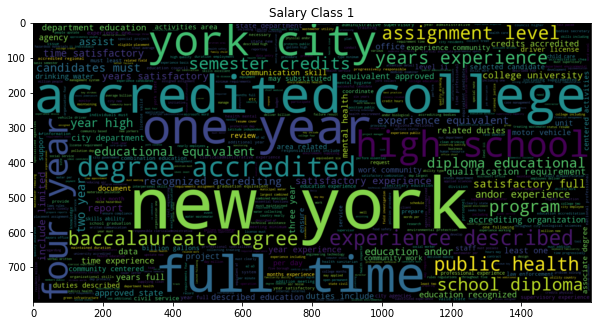

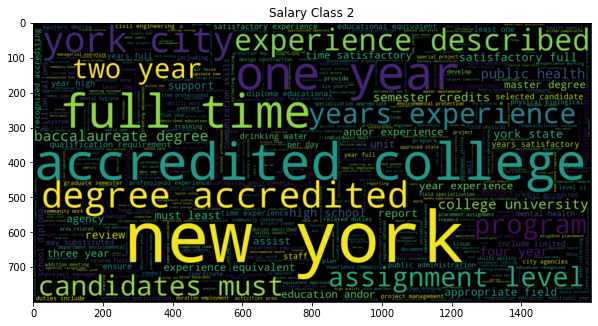

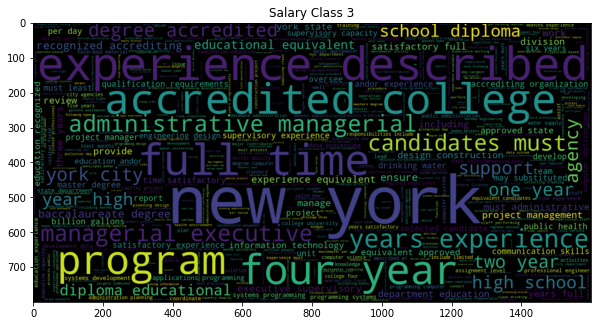

In [ ]:
plt.figure(figsize = (10,12))
plt.title("Salary Class 1")
wc = WordCloud(max_words = 500 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(nyc_jobs_nlp[nyc_jobs_nlp.Salary_Class == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

plt.figure(figsize = (10,12))
plt.title("Salary Class 2")
wc = WordCloud(max_words = 500 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(nyc_jobs_nlp[nyc_jobs_nlp.Salary_Class == 2].text))
plt.imshow(wc , interpolation = 'bilinear')

plt.figure(figsize = (10,12))
plt.title("Salary Class 3")
wc = WordCloud(max_words = 500 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(nyc_jobs_nlp[nyc_jobs_nlp.Salary_Class == 3].text))
plt.imshow(wc , interpolation = 'bilinear')

There are some  similarities and differences as well here between classes;

All class have some words in common like New York, full time, accredited college.

Words "Years experienced" and  "Experience described" is common for all classes. However, in class 3 which is the highest salaried class, it's more repeated. This may mean that experience is more important for higher level positions.

In Class 1, which is the lowest salary one, one of the most visible words is 'high school'. We can also see it in Class 2 and Class 3 but with very small puntos and not that so visible. This means that some lower salaried positions accept high school graduation while most of Class 2 and Class 3 jobs don't.

We only see some words like 'administrative managerial' and 'managerial executive' in Class 3 which might be associated with high level jobs.


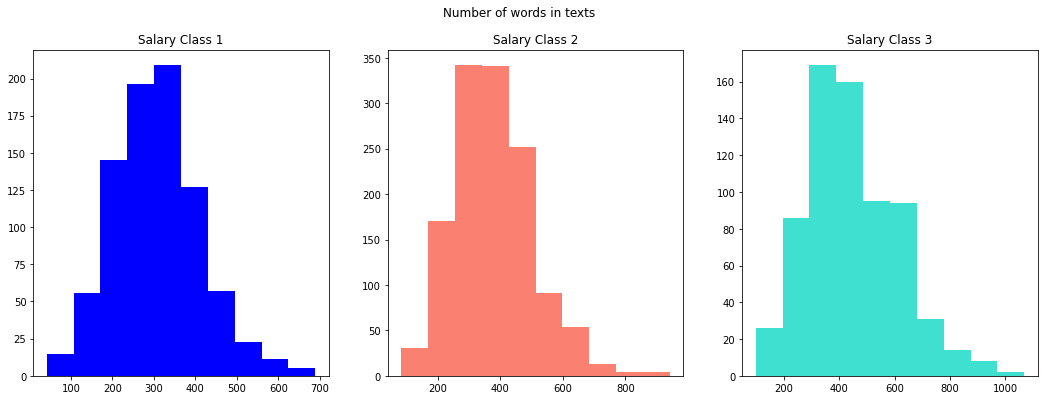

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))
text_len=nyc_jobs_nlp[nyc_jobs_nlp['Salary_Class']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='Blue')
ax1.set_title('Salary Class 1')
text_len=nyc_jobs_nlp[nyc_jobs_nlp['Salary_Class']==2]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='Salmon')
ax2.set_title('Salary Class 2')
fig.suptitle('Number of words in texts')
text_len=nyc_jobs_nlp[nyc_jobs_nlp['Salary_Class']==3]['text'].str.split().map(lambda x: len(x))
ax3.hist(text_len,color='Turquoise')
ax3.set_title('Salary Class 3')
fig.suptitle('Number of words in texts')
plt.show()


plt.show()

They all distribute normally.

Most common number of words for Class 1 is around 300, while it is around 400 for Class 2 and Class 3.

Especially after 400 range, Salary Class 1 have very low number of postings. Salary Class 2 and 3 even have some postings which have higher than 800 words.

We may conclude that lower level positions have less job requirement or description which is expected.


What about average world length in each text?

Text(0.5, 0.98, 'Average word length in each text')

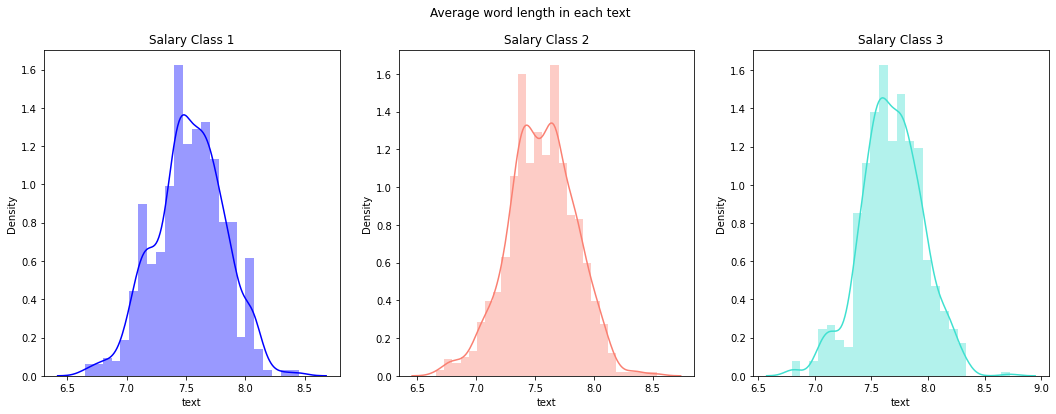

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))

word=nyc_jobs_nlp[nyc_jobs_nlp['Salary_Class']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1, color="Blue")
ax1.set_title('Salary Class 1')

word=nyc_jobs_nlp[nyc_jobs_nlp['Salary_Class']==2]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='Salmon')
ax2.set_title('Salary Class 2')

word=nyc_jobs_nlp[nyc_jobs_nlp['Salary_Class']==3]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='Turquoise')
ax3.set_title('Salary Class 3')

fig.suptitle('Average word length in each text')

Pretty close average word length in each text. Average word length in Salary Class 3 text looks a little bit more.

Let's define our corpus

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(nyc_jobs_nlp.text)
corpus[:10]

['new',
 'york',
 'city',
 'taxi',
 'limousine',
 'commission',
 'tlc',
 'nations',
 'largest',
 'for-hire']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'city': 5855,
 'education': 5296,
 'experience': 16010,
 'health': 6488,
 'management': 5541,
 'must': 6326,
 'new': 7703,
 'work': 6489,
 'years': 7281,
 'york': 5339}

Unigram Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

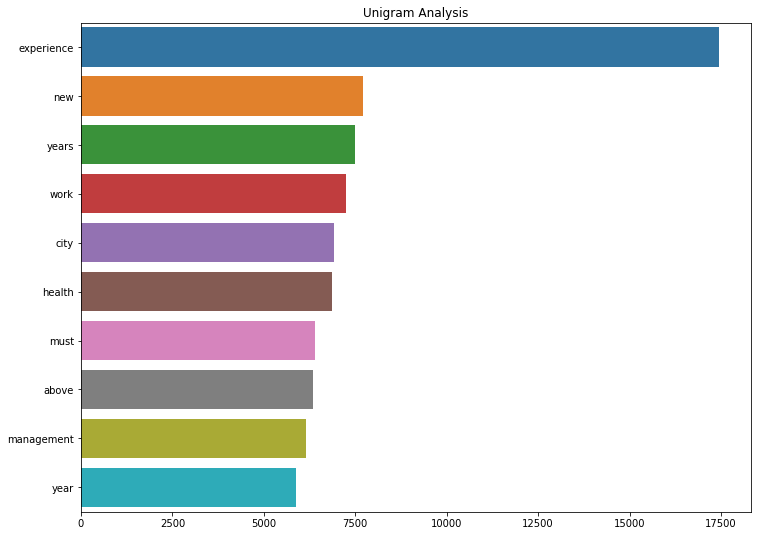

In [ ]:
plt.figure(figsize = (12,9))
plt.title("Unigram Analysis")
most_common_uni = get_top_text_ngrams(nyc_jobs_nlp.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

 Experience is the most common word followed by new  and years. New is coming from New York while years is related to experience.

Bigram Analysis

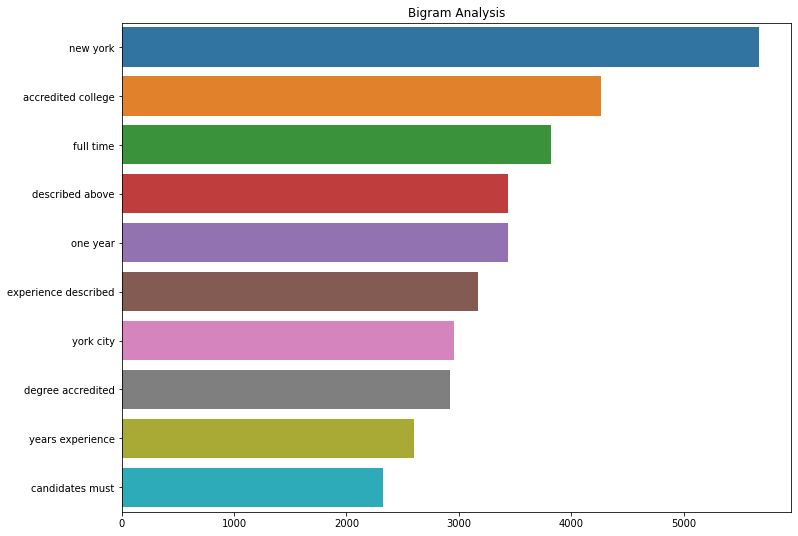

In [ ]:
plt.figure(figsize = (12,9))
plt.title("Bigram Analysis")
most_common_bi = get_top_text_ngrams(nyc_jobs_nlp.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

New York and Accredited College are most occured words. So, accredited college is something important to get job from NYC.

Trigram Analysis

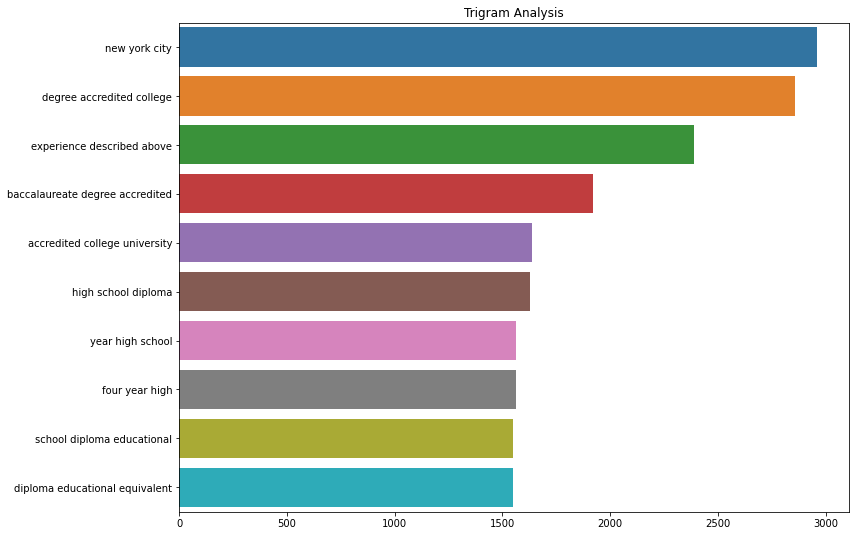

In [ ]:
plt.figure(figsize = (12,9))
plt.title("Trigram Analysis")
most_common_tri = get_top_text_ngrams(nyc_jobs_nlp.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

New York city and Degree Accredited College are most occured triple words.

**GridSearchCV**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nyc_jobs_nlp['text'], 
                                                    nyc_jobs_nlp['Salary_Class'], 
                                                    random_state=0)


In [ ]:
vectorizer = CountVectorizer(analyzer='word', min_df=5, ngram_range=(2,2))
X = vectorizer.fit_transform(nyc_jobs_nlp["text"])

In [ ]:
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

#Y = sentences['Salary_Class']
#X = np.array(sentences.drop(['text','Salary_Class'], 1))

# We split the dataset into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(nyc_jobs_nlp['text'], 
                                                    nyc_jobs_nlp['Salary_Class'], 
                                                    random_state=0)

# Models
lr_params = {"penalty": ["l2"]}
lr = LogisticRegression()

rfc_params = {"n_estimators": [3, 5, 10, 15],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [3, 5, 7, 9]}
rfc = RandomForestClassifier()

gbc_params = {"n_estimators": [3, 5, 10, 15],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [3, 5, 7, 9]}
gbc = GradientBoostingClassifier()

clf_lr = GridSearchCV(lr, lr_params, cv=5)
clf_lr.fit(X_train_vectorized, y_train)

clf_rfc = GridSearchCV(rfc, rfc_params, cv=5)
clf_rfc.fit(X_train_vectorized, y_train)

clf_gbc = GridSearchCV(gbc, gbc_params, cv=5)
clf_gbc.fit(X_train_vectorized, y_train)


print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', clf_lr.score(X_train_vectorized, y_train))
print('\nTest set score:', clf_lr.score(X_test_vectorized, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', clf_rfc.score(X_train_vectorized, y_train))
print('\nTest set score:', clf_rfc.score(X_test_vectorized, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', clf_gbc.score(X_train_vectorized, y_train))
print('\nTest set score:', clf_gbc.score(X_test_vectorized, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.9976448422044277

Test set score: 0.9322033898305084
----------------------Random Forest Scores----------------------
Training set score: 0.647197362223269

Test set score: 0.6271186440677966
----------------------Gradient Boosting Scores----------------------
Training set score: 0.8695242581252944

Test set score: 0.7923728813559322


**As a conclusion of NLP:**

Each model may have some pros and cons. However, based on above selected scores and analysis run accordingly, Random Forest model is the best performing model to explain **Salary Class**. It outcompeted other models in almost each selected scores;

*  R^2 is 0.71 (2nd highest)
*  Highest Precision, Recall and F1 Score highest score (0.82 each)
*  Highest Cross validation score (0.62)
*  Low Cross validation score std (0.04)
*  Random Forest is also producing the highest score with each different feature generation method ( N-gram(1,2) score is 0.99)

The predictive performance of Random Forest Model is always on top and it also provides a reliable feature importance estimate.

What might be the weakness of Random Forest Model?

Random Forest Model is less interpretable than a individual decision tree and the predictions are slower.

**^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^**

**SUPERVISED LEARNING**

In this section, you will find Supervised Learning side of project.

As a brief summary of section;

Data modified and all numeric features created.

Target variable choosen as Salary Class.

Correlation between Salary Class and other variables searched and tried to create best model to predict Salary Class. Worked with different models.






In [ ]:
nyc_jobs["Level"] = nyc_jobs["Level"].astype('category')

In [ ]:
nyc_jobs["Full_Time_Part_Time_indicator"] = nyc_jobs["Full_Time_Part_Time_indicator"].astype('category')

In [ ]:
nyc_jobs["Posting_Type"] = nyc_jobs["Posting_Type"].astype('category')

In [ ]:
nyc_jobs["Agency"] = nyc_jobs["Agency"].astype('category')

In [ ]:
nyc_jobs["Job_Category"] = nyc_jobs["Job_Category"].astype('category')

In [ ]:
nyc_jobs["Level"] = nyc_jobs["Level"].cat.codes

In [ ]:
nyc_jobs["Full_Time_Part_Time_indicator"] = nyc_jobs["Full_Time_Part_Time_indicator"].cat.codes

In [ ]:
nyc_jobs["Posting_Type"] = nyc_jobs["Posting_Type"].cat.codes

In [ ]:
nyc_jobs["Agency"] = nyc_jobs["Agency"].cat.codes

In [ ]:
nyc_jobs["Job_Category"] = nyc_jobs["Job_Category"].cat.codes

In [ ]:
nyc_job_last = nyc_jobs.filter(['Agency', 'Posting_Type', 'Number_Of_Positions', 'Level', 'Job_Category', 'Full_Time_Part_Time_indicator', 'Salary_Range_From', 'Salary_Class', 'Salary_Range_To', 'Salary_Range_Difference', 'Month',
       'Day', 'NbOfday'], axis=1)

In [ ]:
nyc_job_last.head(5)

Agency  Posting_Type  Number_Of_Positions  ...  Month  Day  NbOfday
5        47             1                    1  ...      7    6        4
10       20             1                    3  ...      5    9        2
23       35             0                    1  ...      5    9        2
120      18             1                    1  ...      3   25        4
125      18             0                    1  ...      3   25        4

[5 rows x 13 columns]

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(nyc_job_last['Salary_Class'].dropna()))
print(kurtosis(nyc_job_last['Salary_Class'].dropna()))

0.08764286332466617
-1.135057304149105


Skewness: It is in normality range

Kurtosis:It is out of normality range (-1 to 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nyc_job_last)
nyc_last_scaled = pd.DataFrame(scaled_data, columns=nyc_job_last.columns)
nyc_last_scaled.describe()

Agency  Posting_Type  Number_Of_Positions  ...    Month      Day  NbOfday
count 2831.000      2831.000             2831.000  ... 2831.000 2831.000 2831.000
mean     0.000         0.000               -0.000  ...   -0.000   -0.000    0.000
std      1.000         1.000                1.000  ...    1.000    1.000    1.000
min     -2.003        -0.914               -0.167  ...   -1.953   -1.671   -1.427
25%     -0.390        -0.914               -0.167  ...   -0.656   -0.728   -0.733
50%     -0.088        -0.914               -0.167  ...    0.209   -0.138   -0.040
75%      0.114         1.094               -0.167  ...    0.641    0.806    0.654
max      2.837         1.094               20.904  ...    2.803    1.867    2.734

[8 rows x 13 columns]

In [ ]:
Y = nyc_job_last['Salary_Class']
X = StandardScaler().fit_transform(nyc_job_last.dropna())

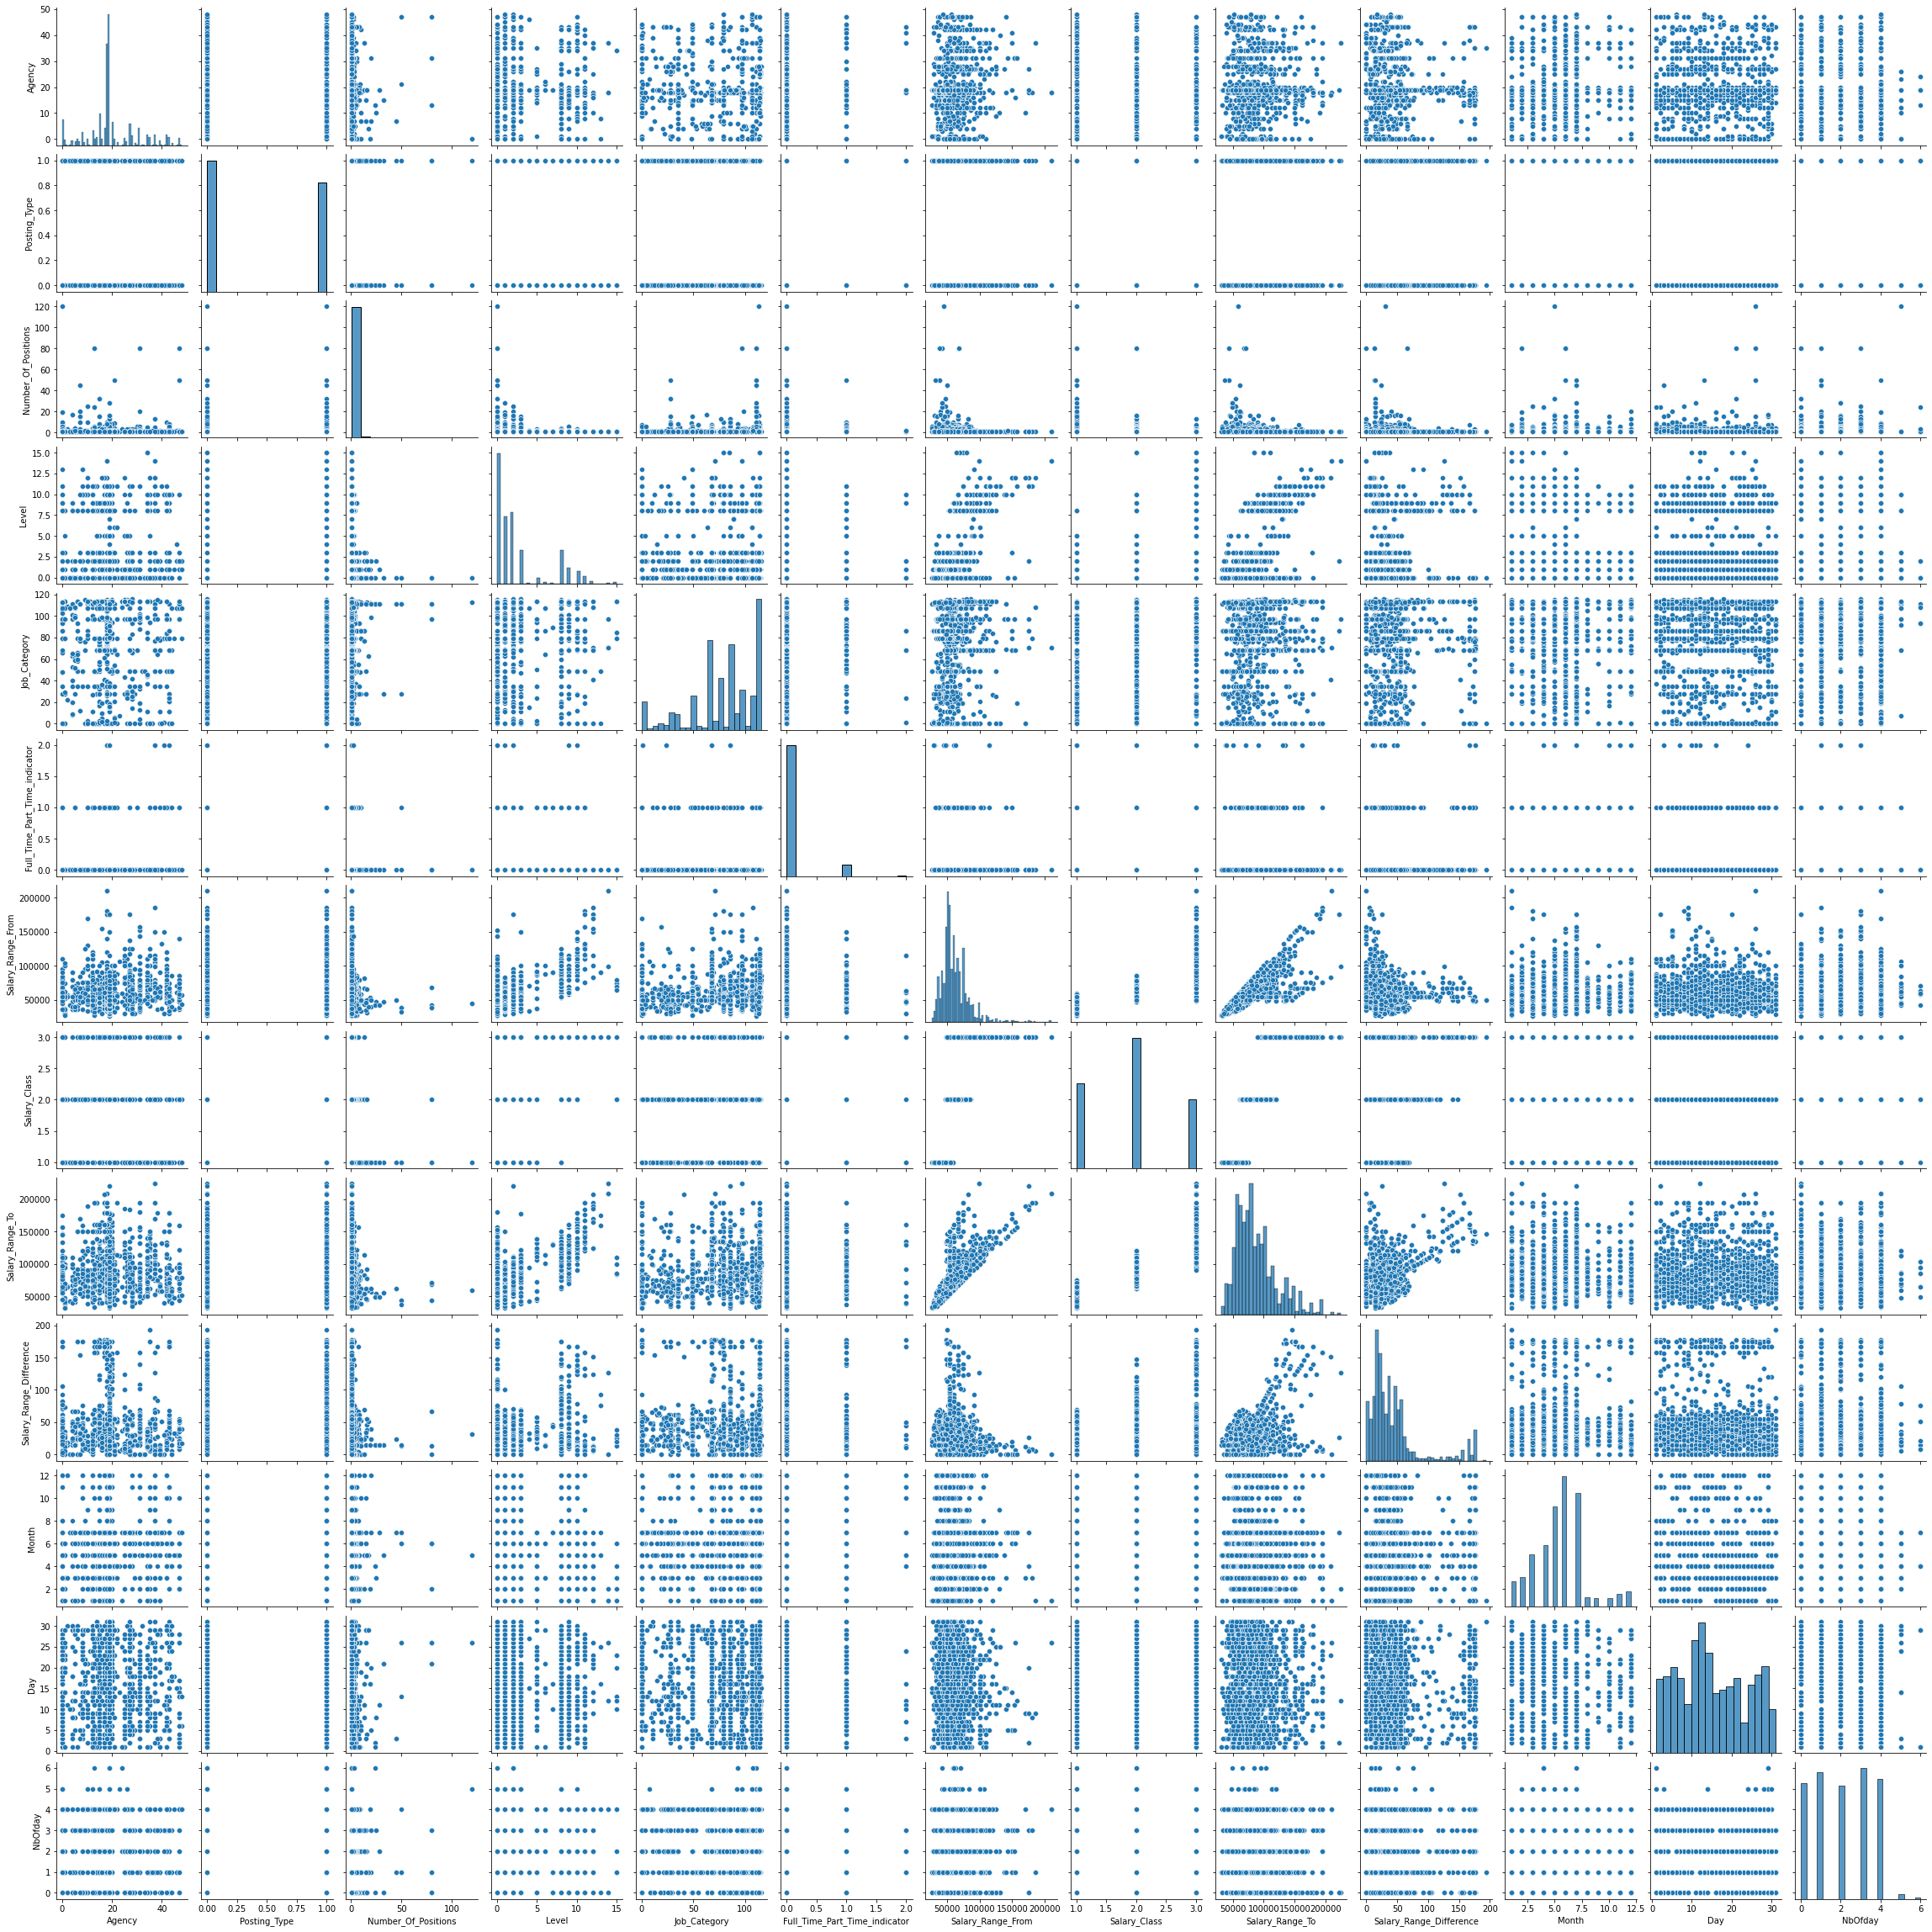

In [ ]:
sns.pairplot(nyc_job_last)

In [ ]:
nyc_job_last.corr()

Agency  Posting_Type  ...    Day  NbOfday
Agency                          1.000        -0.008  ... -0.012    0.035
Posting_Type                   -0.008         1.000  ...  0.003   -0.011
Number_Of_Positions            -0.018         0.000  ...  0.036    0.009
Level                           0.062        -0.001  ... -0.002    0.022
Job_Category                    0.027         0.035  ... -0.104    0.012
Full_Time_Part_Time_indicator   0.045         0.004  ... -0.019   -0.000
Salary_Range_From               0.140         0.020  ... -0.025    0.053
Salary_Class                    0.080         0.014  ... -0.036    0.054
Salary_Range_To                 0.049         0.012  ... -0.032    0.015
Salary_Range_Difference        -0.080        -0.006  ... -0.014   -0.027
Month                           0.069        -0.015  ... -0.111   -0.052
Day                            -0.012         0.003  ...  1.000    0.023
NbOfday                         0.035        -0.011  ...  0.023    1.000

[13 rows x 13 columns]

In [ ]:
correlation = nyc_job_last.corr()
correlation = correlation.sort_values(by=['Salary_Class'], ascending=False)

correlation[['Salary_Class']]

Salary_Class
Salary_Class                          1.000
Salary_Range_To                       0.857
Salary_Range_From                     0.684
Level                                 0.517
Salary_Range_Difference               0.421
Job_Category                          0.129
Agency                                0.080
NbOfday                               0.054
Full_Time_Part_Time_indicator         0.050
Posting_Type                          0.014
Month                                -0.003
Day                                  -0.036
Number_Of_Positions                  -0.134

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

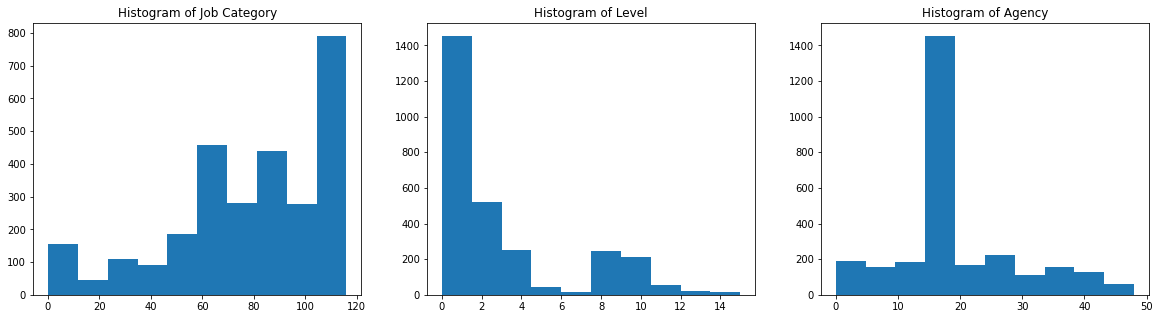

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(nyc_job_last["Job_Category"])
plt.title("Histogram of Job Category")

plt.subplot(1,3,2)
plt.hist(nyc_job_last["Level"])
plt.title("Histogram of Level")

plt.subplot(1,3,3)
plt.hist(nyc_job_last["Agency"])
plt.title("Histogram of Agency")

plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
winsorized_Job_Category = winsorize(nyc_job_last["Job_Category"], (0, 0.10))
winsorized_Job_Category

masked_array(data=[114, 114, 114, ...,  68,  91,  91],
             mask=False,
       fill_value=999999,
            dtype=int8)

In [ ]:
winsorized_Level = winsorize(nyc_job_last["Level"], (0, 0.10))
winsorized_Level

masked_array(data=[2, 3, 9, ..., 0, 3, 3],
             mask=False,
       fill_value=999999,
            dtype=int8)

In [ ]:
winsorized_Agency = winsorize(nyc_job_last["Agency"], (0, 0.10))
winsorized_Agency

masked_array(data=[35, 20, 35, ..., 27, 19, 19],
             mask=False,
       fill_value=999999,
            dtype=int8)

Text(0.5, 1.0, 'Histogram of Agency')

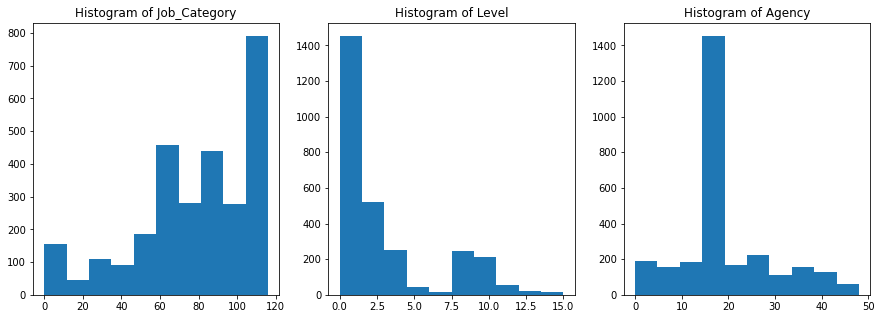

In [ ]:
plt.figure(figsize=(15,5))

# histograms of the original data
plt.subplot(1, 3, 1)
plt.hist(nyc_job_last["Job_Category"])
plt.title("Histogram of Job_Category")

plt.subplot(1, 3, 2)
plt.hist(nyc_job_last["Level"])
plt.title("Histogram of Level")

plt.subplot(1, 3, 3)
plt.hist(nyc_job_last["Agency"])
plt.title("Histogram of Agency")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [ ]:
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00035336e+00 -7.87582038e-03 -1.76576728e-02  6.19506444e-02
   2.71457677e-02  4.49504615e-02  1.39889842e-01  7.98022445e-02
   4.90791682e-02 -7.97178591e-02  6.92040738e-02 -1.15855092e-02
   3.54205079e-02]
 [-7.87582038e-03  1.00035336e+00  3.00932688e-04 -5.95426200e-04
   3.53577875e-02  4.11719447e-03  1.98479709e-02  1.39393542e-02
   1.24071603e-02 -6.42391223e-03 -1.53799282e-02  2.67730286e-03
  -1.14249980e-02]
 [-1.76576728e-02  3.00932688e-04  1.00035336e+00 -9.72872715e-02
   6.10734832e-02 -1.84242294e-02 -9.50502944e-02 -1.34304890e-01
  -1.16310015e-01 -5.43997458e-02 -9.49154824e-03  3.62093110e-02
   8.72867843e-03]
 [ 6.19506444e-02 -5.95426200e-04 -9.72872715e-02  1.00035336e+00
   6.74312023e-02 -1.29859622e-03  4.82675398e-01  5.16812628e-01
   6.23639026e-01  2.99477373e-01 -5.31941384e-02 -2.22413655e-03
   2.21035463e-02]
 [ 2.71457677e-02  3.53577875e-02  6.10734832e-02  6.74312023e-02
   1.00035336e+00 -1.10065199e-02  1.29372591e

In [ ]:
import sklearn
from sklearn import linear_model

In [ ]:
lr = LogisticRegression()
# fit method estimates the coefficients using OLS
lr.fit(X, Y)
# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)


Coefficients: 
 [[-5.22941137e-02 -1.52400246e-03  6.40272942e-02 -1.75039946e-01
  -7.19412444e-02 -2.66923046e-02 -1.83137578e+00 -6.02653121e+00
  -1.88890396e+00 -5.93286465e-01 -3.27741744e-02  1.68746978e-02
  -5.68899033e-02]
 [-2.72487267e-02  7.33901279e-03 -2.61239329e-02  1.76096790e-02
  -4.91851658e-02 -9.20868162e-03 -5.25007139e-02  2.19181412e-01
   5.49754126e-02 -7.83085053e-02 -1.24205874e-02  2.70026557e-02
  -2.82497661e-03]
 [ 7.95428405e-02 -5.81501033e-03 -3.79033613e-02  1.57430267e-01
   1.21126410e-01  3.59009862e-02  1.88387649e+00  5.80734980e+00
   1.83392855e+00  6.71594970e-01  4.51947618e-02 -4.38773535e-02
   5.97148800e-02]]

Intercept: 
 [-1.8866342   4.26406342 -2.37742922]


In [ ]:
predictions = lr.predict(X)
errors = Y - predictions
print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: 0.0


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Salary_Class   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.655e+29
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:33:46   Log-Likelihood:                 86453.
No. Observations:                2831   AIC:                        -1.729e+05
Df Residuals:                    2817   BIC:                        -1.728e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9438   2.49e-16    7.8e+15      0.000       1.944       1.944
x1          4.711e-17   2.53e-16      0.186      0.852    -4.5e-16    5.44e-16
x2         -1.144e-16   2.49e-16     -0.459      0.647   -6.03e-16    3.75e-16
x3          1.721e-16   2.53e-16      0.681      0.496   -3.23e-16    6.68e-16
x4         -3.008e-16   3.25e-16     -0.926      0.355   -9.38e-16    3.36e-16
x5         -2.544e-16   2.56e-16     -0.994      0.320   -7.56e-16    2.47e-16
x6         -3.198e-17    2.5e-16     -0.128      0.898   -5.23e-16    4.59e-16
x7         -2.145e-16   1.25e-15     -0.172      0.864   -2.66e-15    2.23e-15
x8             0.7328   5.22e-16    1.4e+15      0.000       0.733       0.733
x9         -7.142e-16   1.61e-15     -0.443      0.658   -3.88e-15    2.45e-15
x10        -4.021e-16   1.21e-15     -0.332      0.740   -2.78e-15    1.97e-15
x11          8.63e-17   2.53e-16      0.342      0.733   -4.09e-16    5.82e-16
x12           8.3e-17   2.53e-16      0.329      0.742   -4.12e-16    5.78e-16
x13        -3.339e-17   2.51e-16     -0.133      0.894   -5.25e-16    4.58e-16
==============================================================================
Omnibus:                      497.758   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.224
Skew:                           1.110   Prob(JB):                    2.20e-193
Kurtosis:                       4.611   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(nyc_job_last)
scaler = StandardScaler()
scaled = scaler.fit_transform(nyc_job_last)
print(scaled)

      Agency  Posting_Type  Number_Of_Positions  ...  Month  Day  NbOfday
5         47             1                    1  ...      7    6        4
10        20             1                    3  ...      5    9        2
23        35             0                    1  ...      5    9        2
120       18             1                    1  ...      3   25        4
125       18             0                    1  ...      3   25        4
...      ...           ...                  ...  ...    ...  ...      ...
3413      27             0                    1  ...      7   16        0
3414      27             1                    1  ...      7   16        0
3415      27             0                    1  ...      7   16        0
3418      19             1                    1  ...      7   16        0
3419      19             0                    1  ...      7   16        0

[2831 rows x 13 columns]
[[ 2.73576136  1.09374411 -0.16711956 ...  0.64135625 -1.08149233
   1.34715591]
 [ 0.

In [ ]:
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00035336e+00 -7.87582038e-03 -1.76576728e-02
   6.19506444e-02  2.71457677e-02  4.49504615e-02  1.39889842e-01
   7.98022445e-02  4.90791682e-02 -7.97178591e-02  6.92040738e-02
  -1.15855092e-02  3.54205079e-02]
 [ 0.00000000e+00 -7.87582038e-03  1.00035336e+00  3.00932688e-04
  -5.95426200e-04  3.53577875e-02  4.11719447e-03  1.98479709e-02
   1.39393542e-02  1.24071603e-02 -6.42391223e-03 -1.53799282e-02
   2.67730286e-03 -1.14249980e-02]
 [ 0.00000000e+00 -1.76576728e-02  3.00932688e-04  1.00035336e+00
  -9.72872715e-02  6.10734832e-02 -1.84242294e-02 -9.50502944e-02
  -1.34304890e-01 -1.16310015e-01 -5.43997458e-02 -9.49154824e-03
   3.62093110e-02  8.72867843e-03]
 [ 0.00000000e+00  6.19506444e-02 -5.95426200e-0

In [ ]:
# Calculating eigenvalues and eigenvectors.

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[ 0.          0.06159317  0.01029334 -0.1033507   0.41765287  0.0802735
  0.03202457  0.41023461  0.5128503   0.53921451  0.28179554 -0.0210349
 -0.02813003  0.02851288]
Eigenvalue 1: 3.1666778883101463
----------------------------------------
Eigenvector 2: 
[ 0.00000000e+00 -4.96634849e-04 -1.06269051e-03  1.92980053e-04
 -1.87132228e-02 -7.10413758e-03  2.69079872e-03 -5.20803330e-01
 -2.58819055e-03  6.82188197e-01 -5.12764400e-01  4.12114957e-03
  1.79582735e-03  4.42848754e-03]
Eigenvalue 2: 0.011506597189538191
----------------------------------------
Eigenvector 3: 
[ 0.          0.00572078 -0.002648   -0.02584989 -0.14705152  0.04269922
  0.00733272  0.3942302  -0.77059758  0.43575441  0.18843112  0.01970195
  0.00672228  0.02704206]
Eigenvalue 3: 0.1469769693699082
----------------------------------------
Eigenvector 4: 
[ 0.         -0.02093715  0.02273293 -0.01093073  0.8845134   0.04502628
  0.06863788 -0.17732923 -0.36823132 -0.17044478 -0.07649258  0.0803

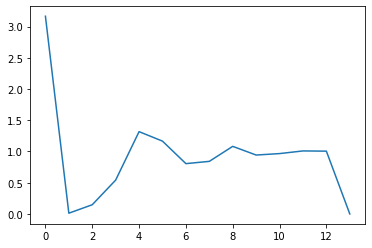

[3.16667789 0.0115066  0.14697697 0.54146021 1.31796407 1.1661474
 0.8054363  0.8419611  1.08233201 0.94326143 0.96641906 1.00907665
 1.00537395 0.        ]


In [ ]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

Both the scree plot and the eigenvalues >1 rule agree that we should keep only 6 components.
Ultimately we have a solution that encompasses over 57% of the data's variance in just  components, rather than 14 variables.

In [ ]:
# Y is the target variable (Salary Class)
Y = nyc_job_last['Salary_Class']
# X is the feature set
X = nyc_job_last[['Job_Category','Level']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lr = LogisticRegression()

# fit method estimates the coefficients using OLS
lr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)


Coefficients: 
 [[-0.00551786 -0.27063157]
 [-0.00030548 -0.00934449]
 [ 0.00582334  0.27997606]]

Intercept: 
 [ 0.97119371  0.63603617 -1.60722987]


In [ ]:
# Y is the target variable (Salary Class)
Y = nyc_job_last['Salary_Class']
# X is the feature set
X = nyc_job_last[['Job_Category','Agency']]

lr = LogisticRegression()

lr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)


Coefficients: 
 [[-0.00577841 -0.00806117]
 [ 0.00020509 -0.00575344]
 [ 0.00557332  0.01381461]]

Intercept: 
 [ 0.53845929  0.47110268 -1.00956197]


In [ ]:
# Y is the target variable (Salary Class)
Y = nyc_job_last['Salary_Class']
# X is the feature set
X = nyc_job_last[['Agency','Level']]

lr = LogisticRegression()

lr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)


Coefficients: 
 [[-0.00805188 -0.27761204]
 [-0.00544916 -0.00546039]
 [ 0.01350104  0.28307242]]

Intercept: 
 [ 0.70778757  0.70575878 -1.41354635]


Let's check mean of the error by taking the difference between the measured value and true/correct value.

In [ ]:
predictions = lr.predict(X)
errors = Y - predictions

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: -0.23242670434475451


Let's train the model

In [ ]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Salary_Class   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     520.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.59e-193
Time:                        06:34:08   Log-Likelihood:                -2692.8
No. Observations:                2831   AIC:                             5392.
Df Residuals:                    2828   BIC:                             5410.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5785      0.028     57.398      0.000       1.525       1.632
Agency         0.0035      0.001      2.978      0.003       0.001       0.006
Level          0.1092      0.003     31.892      0.000       0.103       0.116
==============================================================================
Omnibus:                       97.339   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.787
Skew:                           0.185   Prob(JB):                     7.69e-13
Kurtosis:                       2.421   Cond. No.                         52.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, I will try to find the best features to predict my target variable Salary_Class by trial end error method

In [ ]:
# Y is the target variable, in other words what are trying to predict.
Y = nyc_job_last['Salary_Class']
# X is the feature set
X = nyc_job_last[['Job_Category', 'Level']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

# We add constant to the model as it's a best practice
# to do so every time!
X_train = sm.add_constant(X_train)
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()
# We print the summary results
print(results.summary())

The number of observations in the training set is 2264
The number of observations in the test set is 567
                            OLS Regression Results                            
Dep. Variable:           Salary_Class   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     432.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.30e-159
Time:                        06:34:14   Log-Likelihood:                -2129.4
No. Observations:                2264   AIC:                             4265.
Df Residuals:                    2261   BIC:                             4282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [ ]:
# Y is the target variable, in other words what are trying to predict.
Y = nyc_job_last['Salary_Class']
# X is the feature set
X = nyc_job_last[['Job_Category', 'Agency']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()
# We print the summary results
print(results.summary())

The number of observations in the training set is 2264
The number of observations in the test set is 567
                            OLS Regression Results                            
Dep. Variable:           Salary_Class   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     28.06
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           9.19e-13
Time:                        06:34:26   Log-Likelihood:                -2467.9
No. Observations:                2264   AIC:                             4942.
Df Residuals:                    2261   BIC:                             4959.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [ ]:
# Y is the target variable, in other words what are trying to predict.
Y = nyc_job_last['Salary_Class']
# X is the feature set
X = nyc_job_last[['Job_Category', 'Level', 'Agency']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()
# We print the summary results
print(results.summary())

The number of observations in the training set is 2264
The number of observations in the test set is 567
                            OLS Regression Results                            
Dep. Variable:           Salary_Class   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     291.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.92e-160
Time:                        06:34:34   Log-Likelihood:                -2125.7
No. Observations:                2264   AIC:                             4259.
Df Residuals:                    2260   BIC:                             4282.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

Looks like I reached the highest R score and no opportunity seems to find the better feature set when I consider all the features in dataset.

So, final feature set is; 'Job_Category', 'Level', 'Agency' which means these are the best features to explain Salary_Class

**Overfitting Check**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We fit an OLS model using sklearn
lr = LogisticRegression()
lr.fit(X_train, y_train)
# We are making predictions here
y_preds_train = lr.predict(X_train)
y_preds_test = lr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The number of observations in training set is 2264
The number of observations in test set is 567
R-squared of the model in the training set is: 0.5468197879858657
-----Test set statistics-----
R-squared of the model in the test set is: 0.5079365079365079
Mean absolute error of the prediction is: 0.5008818342151675
Mean squared error of the prediction is: 0.5185185185185185
Root mean squared error of the prediction is: 0.7200822998230956
Mean absolute percentage error of the prediction is: 37.007642563198154


Model is overfitting. Let's do something to solve this;

First  add penalty and increase max_iter;

In [ ]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.5468197879858657
Score on test data:  0.5079365079365079


Nothing changed actually

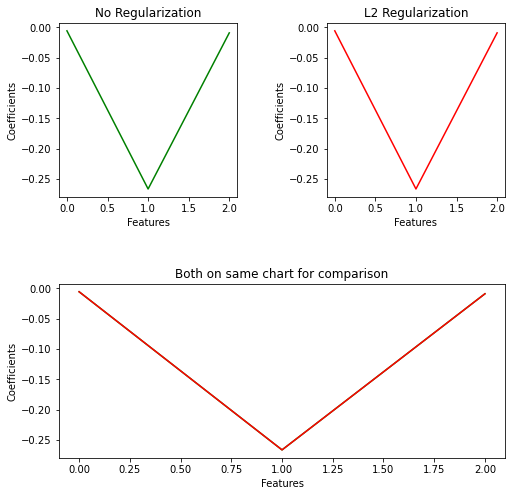

In [ ]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(2, 2, hspace=0.5, wspace=0.5)


x = np.arange(0, len(lr.coef_[0]),1)
y = lr.coef_[0]
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(x, y, '-g')
ax1.set(xlabel='Features', ylabel='Coefficients')
ax1.set_title('No Regularization')

y_reg = lr_regularized.coef_[0]
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(x, y_reg, '-r')
ax2.set(xlabel='Features', ylabel='Coefficients')
ax2.set_title('L2 Regularization')

ax3 = fig.add_subplot(grid[1, 0:])
ax3.plot(x, y, '-g')
ax3.plot(x, y_reg, '-r')

ax3.set(xlabel='Features', ylabel='Coefficients')
ax3.set_title('Both on same chart for comparison')
plt.show()

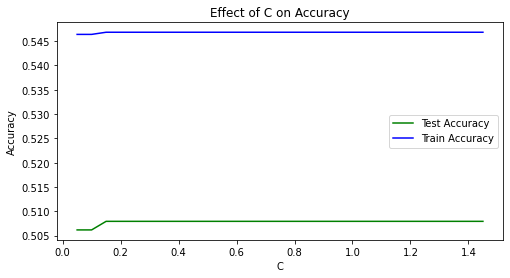

In [ ]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

Let's scale the data and then try it again

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nyc_job_last)
data_df_scaled = pd.DataFrame(scaled_data, columns=nyc_job_last.columns)
data_df_scaled.describe()

Agency  Posting_Type  Number_Of_Positions  ...    Month      Day  NbOfday
count 2831.000      2831.000             2831.000  ... 2831.000 2831.000 2831.000
mean     0.000         0.000               -0.000  ...   -0.000   -0.000    0.000
std      1.000         1.000                1.000  ...    1.000    1.000    1.000
min     -2.003        -0.914               -0.167  ...   -1.953   -1.671   -1.427
25%     -0.390        -0.914               -0.167  ...   -0.656   -0.728   -0.733
50%     -0.088        -0.914               -0.167  ...    0.209   -0.138   -0.040
75%      0.114         1.094               -0.167  ...    0.641    0.806    0.654
max      2.837         1.094               20.904  ...    2.803    1.867    2.734

[8 rows x 13 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df_scaled, nyc_job_last.Salary_Class, random_state=2)
lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2', C=0.6, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  1.0
Score on test data:  1.0


A very significant increase in test accuracy.



In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 460.069 and p value is 4.64e-102
Levene test statistic value is 429.174 and p value is 5.9e-92


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means my errors are heteroscedastic. So my errors are defnitely homoscedastic which means distribution of my model's error terms (known as "scedasticity") is consistent for all predicted values.

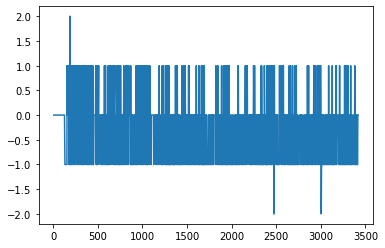

In [ ]:
plt.plot(errors)
plt.show()

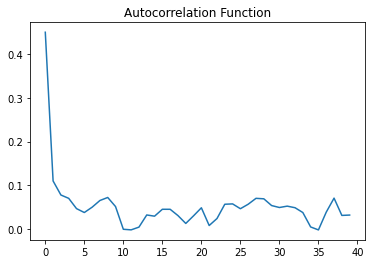

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.title("Autocorrelation Function")
plt.show()

So, the autocorrelation between the errors of my model is very low 

In [ ]:
acf_data

array([ 1.00000000e+00,  4.49100766e-01,  1.10133070e-01,  7.81297073e-02,
        7.05152912e-02,  4.71173803e-02,  3.82119088e-02,  5.03313915e-02,
        6.56193964e-02,  7.24974197e-02,  5.18179737e-02,  2.15954766e-05,
       -1.31489255e-03,  4.91760297e-03,  3.26251100e-02,  2.98612126e-02,
        4.55992748e-02,  4.55538423e-02,  3.12114408e-02,  1.33095763e-02,
        3.07296349e-02,  4.89906916e-02,  8.57734689e-03,  2.45108796e-02,
        5.70689053e-02,  5.78644709e-02,  4.68860621e-02,  5.71280780e-02,
        7.05386162e-02,  6.94567151e-02,  5.40778450e-02,  4.96319512e-02,
        5.27550409e-02,  4.91501452e-02,  3.81717365e-02,  5.32737525e-03,
       -1.44604267e-03,  3.90719074e-02,  7.09844053e-02,  3.16075292e-02,
        3.24030948e-02])

Let's check if the errors are normally distributed? 

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 71.81541417977448 and p value is 2.220446049250313e-16
Normality test statistics is 117.27120961766369 and p value is 3.4267339590232643e-26


The p-values of both tests indicate that our errors are not normally distributed.

Let's see cross validation score

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, Y, cv=5)

array([0.49029982, 0.5335689 , 0.59717314, 0.55477032, 0.51060071])

In [ ]:
lr_cv_array = cross_val_score(lr, X, Y, cv=5)

Boxplot of cross validation scores;

{'boxes': [<matplotlib.lines.Line2D at 0x7fcc7bd9b668>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcc7bd290b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc7bd29b38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc7bd297b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcc7bd9b978>,
  <matplotlib.lines.Line2D at 0x7fcc7bd9bcf8>]}

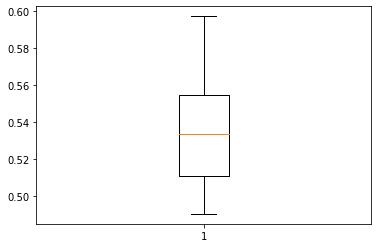

In [ ]:
plt.boxplot(lr_cv_array)

In [ ]:
x = nyc_job_last[['Job_Category', 'Level', 'Agency']]
y = nyc_job_last.Salary_Class
test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [ ]:
lr = LogisticRegression()  
  
# fit the regressor with X and Y data 
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
cv_score=cross_val_score(lr, X, Y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.5372825795676208
0.036948055118545195


DECISION TREE MODEL

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus

In [ ]:
!pip install pydotplus

In [ ]:
x = nyc_job_last[['Job_Category', 'Level', 'Agency']]
y = nyc_job_last.Salary_Class
test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [ ]:
# create a regressor object 
dtc = DecisionTreeClassifier(random_state = 0, max_depth=3, min_samples_leaf=5)  
  
# fit the regressor with X and Y data 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = dtc.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3,
       2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 2, 2, 3, 2, 2, 2, 1, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 3, 1, 2, 3, 2, 2, 2, 2, 2,

In [ ]:
dtc.score(X_test, y_test)

0.5573192239858906

Not satisfying test score.

Let's check if it is overfitting

In [ ]:
dtc.score(X_train, y_train)

0.5843639575971732

Not overfitting actually.

In [ ]:
cv_score=cross_val_score(dtc, X, Y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.564831329731212
0.01968929961253294


In [ ]:
from sklearn.tree import export_graphviz  
export_graphviz(dtc, out_file ='tree.dot', 
               feature_names =['Job_Category', 'Level', 'Agency'])  

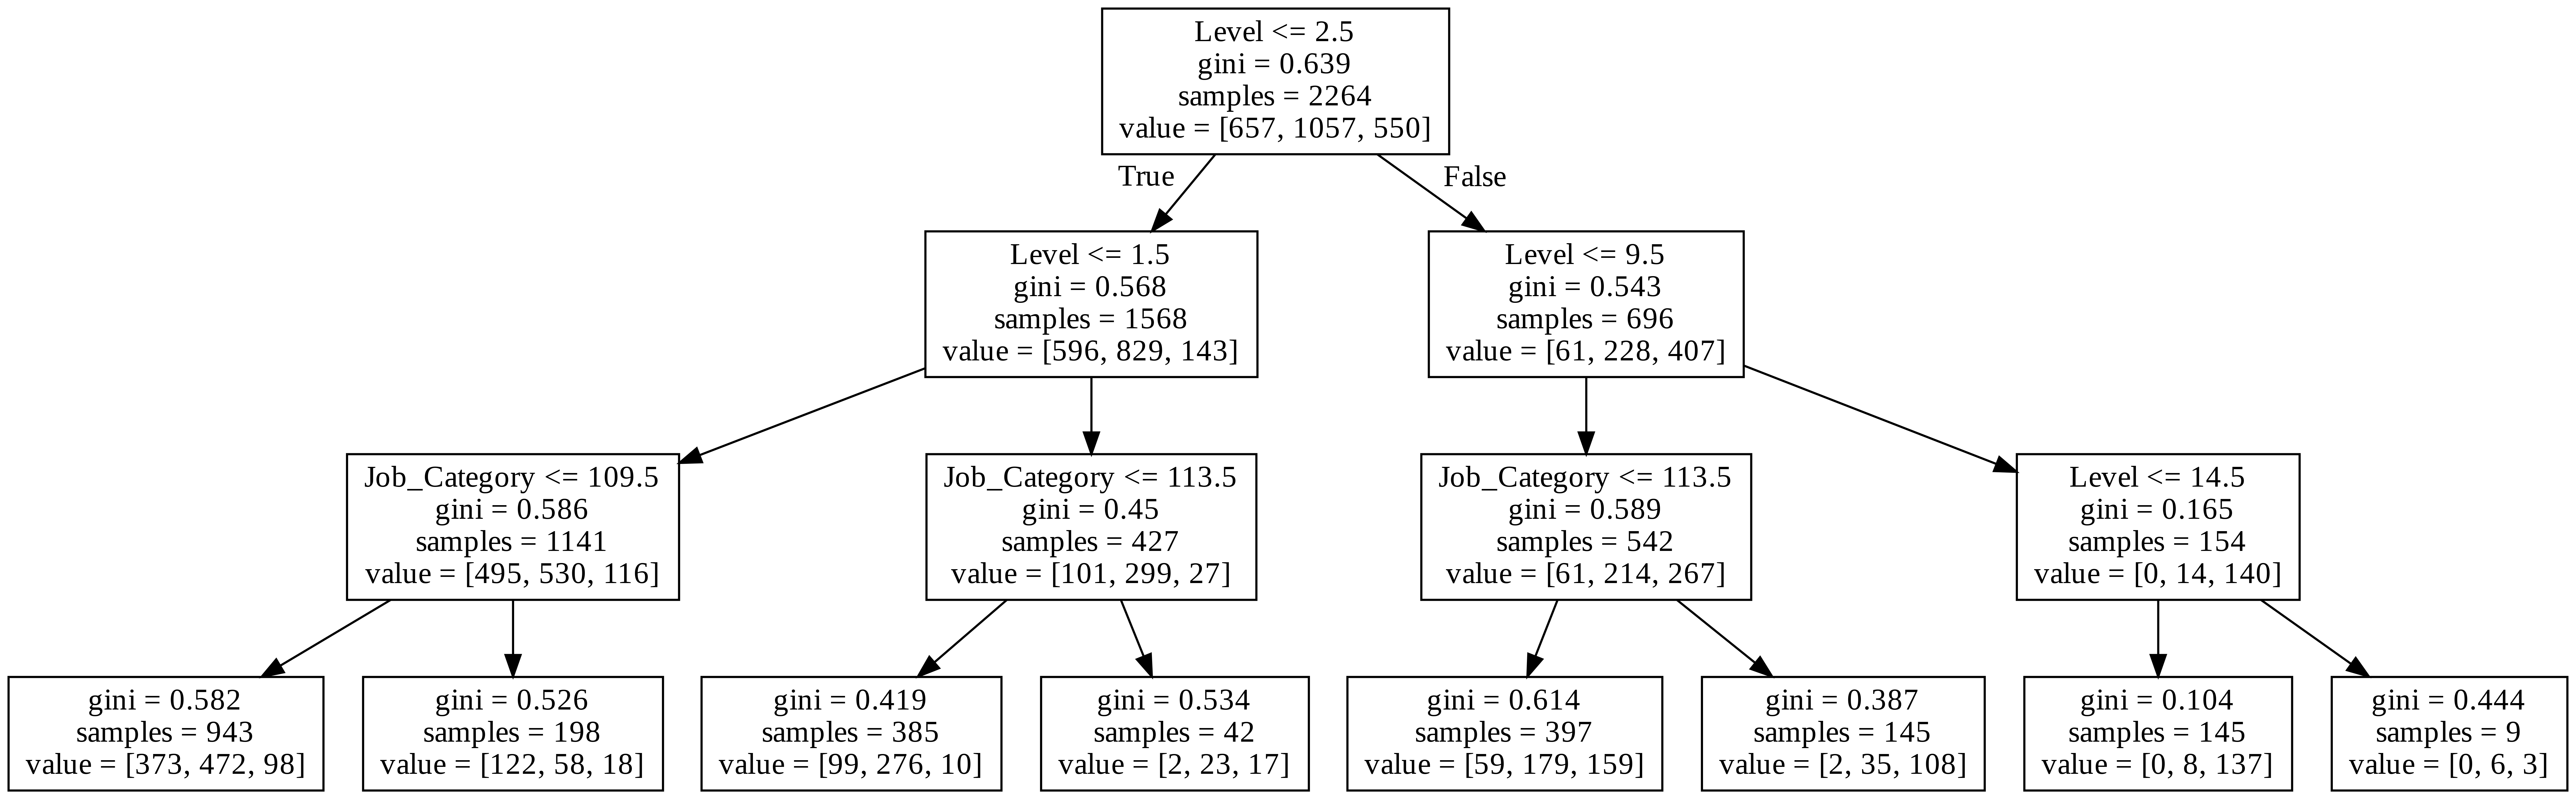

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename='tree.png')

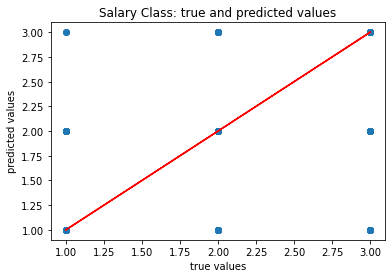

In [ ]:
plt.scatter(Y, dtc.predict(X))
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Salary Class: true and predicted values")
plt.show()

In [ ]:
cross_val_score(dtc, X, Y, cv=5)

array([0.52733686, 0.57067138, 0.58303887, 0.56537102, 0.57773852])

In [ ]:
dtc_cv_array = cross_val_score(dtc, X, Y, cv=5)

Boxplot of cross validation scores;

{'boxes': [<matplotlib.lines.Line2D at 0x7fcc7bbdf400>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcc7bbdfe10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc7bbeb8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc7bbeb550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcc7bbdf710>,
  <matplotlib.lines.Line2D at 0x7fcc7bbdfa90>]}

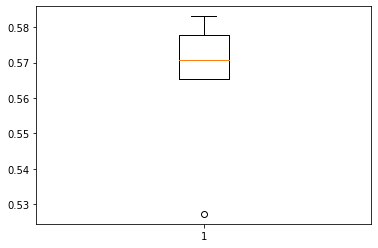

In [ ]:
plt.boxplot(dtc_cv_array)

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf")
X = nyc_job_last[['Job_Category', 'Level', 'Agency']]
Y = nyc_job_last.Salary_Class
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

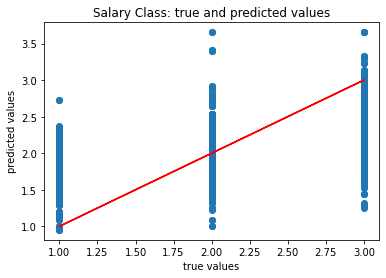

In [ ]:
plt.scatter(Y, svr.predict(X))
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Salary Class: true and predicted values")
plt.show()

Let's check cross validation score to see how stable is my model.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.19977913, 0.35675535, 0.1648022 , 0.19243668, 0.18906798])

In [ ]:
svr_cv_array = cross_val_score(svr, X, Y, cv=5)

Boxplot of Cross validation

{'boxes': [<matplotlib.lines.Line2D at 0x7fcc7bae4c88>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcc7baf26d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc7bafc198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc7baf2dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcc7bae4f98>,
  <matplotlib.lines.Line2D at 0x7fcc7baf2358>]}

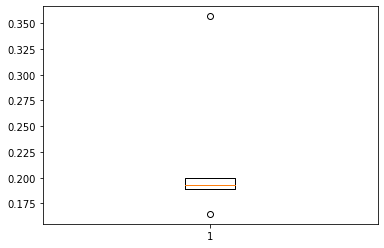

In [ ]:
plt.boxplot(svr_cv_array)

In [ ]:
x = nyc_job_last[['Job_Category', 'Level', 'Agency']]
y = nyc_job_last.Salary_Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr.score(x_test, y_test)

0.3052813002963052

In [ ]:
svr.score(x_train, y_train)

0.28724113031208964

Not too much difference between test and training scores. So, no overfitting

In [ ]:
y_pred = svr.predict(x_test)
y_pred

array([1.83016922, 1.67744319, 2.14976707, 1.91891731, 2.0121126 ,
       1.93635023, 1.99812837, 2.64787467, 1.78466717, 1.71861369,
       2.71933637, 2.17166026, 1.72892594, 1.971244  , 2.88746127,
       1.83016922, 1.41355727, 1.98752085, 2.24314489, 2.09979942,
       1.8761337 , 1.8761337 , 1.45817109, 2.3372854 , 2.42627876,
       1.91891731, 1.83016922, 2.86126714, 2.88209479, 1.87955235,
       1.8761337 , 2.04293263, 1.68180368, 2.71355566, 2.34448445,
       2.07939323, 2.19706496, 1.98050099, 2.87823966, 1.90621358,
       1.93635023, 2.18847539, 2.68243645, 1.87209114, 2.77008282,
       2.87341095, 2.06254689, 2.19297956, 1.75008696, 1.89979965,
       2.34448445, 1.98050099, 1.80345719, 1.50271516, 1.72792413,
       3.11320863, 1.89638216, 1.91659635, 2.00628633, 1.83016922,
       2.68243645, 2.26672783, 2.72506555, 2.7786419 , 1.89979965,
       2.46956664, 2.92268883, 1.70714996, 1.89979965, 2.00280385,
       1.93458473, 2.14600866, 2.24049866, 1.91891731, 1.83360

In [ ]:
cv_score=cross_val_score(svr, X, Y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.22056826875363605
0.06909792941769481


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbc.score(x_test, y_test)

0.7213403880070547

Looking at the sampling of individual model score , these are certainly 'good learners'! They perform good. Yet in aggregate, the models are able to explain nearly 71% of the variance in Salary Class in the dataset.

In [ ]:
gbc.score(x_train, y_train)

0.7473498233215548

Not big difference between train and test scores which implies no overfitting problem.

In [ ]:
cv_score=cross_val_score(gbc, X, Y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.6474707249736696
0.009648835258134454


In [ ]:
cv_score

array([0.65784832, 0.6590106 , 0.64664311, 0.63780919, 0.6360424 ])

In [ ]:
gbc_cv_array = cross_val_score(gbc, X, Y, cv=5)

Boxplot of cross validation scores

{'boxes': [<matplotlib.lines.Line2D at 0x7fcc7b9fc0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcc7b9fcac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc7ba06588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc7ba06208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcc7b9fc3c8>,
  <matplotlib.lines.Line2D at 0x7fcc7b9fc748>]}

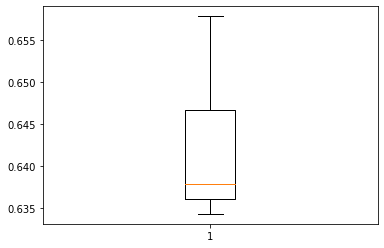

In [ ]:
plt.boxplot(gbc_cv_array)

Let's check cross validation scores to see how stable is my model.

In [ ]:
y_pred = gbc.predict(x_test)
y_pred

array([2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 1, 3, 3, 2, 3, 1, 3, 2, 1, 2, 2, 2,
       3, 3, 3, 3, 1, 2, 3, 1, 1, 2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 3, 2, 3,
       3, 1, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 3,
       3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 2, 3, 1, 2, 1, 2, 1, 1,
       3, 2, 1, 2, 1, 3, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 1, 2, 2, 3, 2, 2, 1, 3, 3,
       3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3, 2, 2, 1, 1,
       2, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 2, 1,
       1, 2, 1, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 1, 2, 1,
       2, 2, 1, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 1,
       2, 3, 3, 2, 1, 2, 2, 3, 3, 3, 1, 1, 2, 2, 3, 3, 2, 2, 3, 2, 1, 3,
       1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 2, 2, 2,

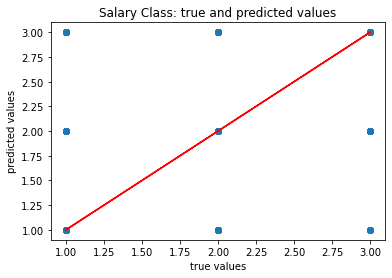

In [ ]:
plt.scatter(Y, gbc.predict(X))
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Salary Class: true and predicted values")
plt.show()

RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = ensemble.RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(x_test, y_test)

0.7671957671957672

In [ ]:
rfc.score(x_train, y_train)

0.8295053003533569

It's not a big difference but still difference with test and training results which may imply overfitting risk for model as in usual in Random Forest models.

Let's check cross validation score to see how stable is my model

In [ ]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, Y, cv=5)

array([0.68077601, 0.64487633, 0.60070671, 0.63074205, 0.59010601])

In [ ]:
rfc_cv_array = cross_val_score(rfc, X, Y, cv=5)

Boxplot Of cross validation scores

{'boxes': [<matplotlib.lines.Line2D at 0x7fcc791cdb00>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcc7ba49dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc791daef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc791daba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcc791cde10>,
  <matplotlib.lines.Line2D at 0x7fcc791da1d0>]}

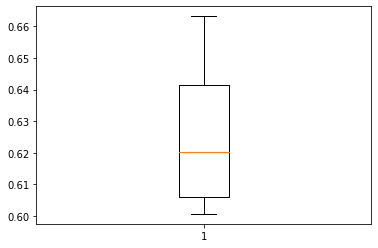

In [ ]:
plt.boxplot(rfc_cv_array)

In [ ]:
cv_score=cross_val_score(rfc, X, Y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.6209689581892173
0.025325982232628316


In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc.predict(x_test)
y_pred

array([1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3, 3,
       2, 2, 2, 1, 1, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 1, 3, 2, 1, 2, 2, 2,
       3, 3, 3, 3, 1, 3, 3, 1, 1, 2, 2, 3, 1, 2, 2, 1, 2, 3, 3, 3, 3, 3,
       3, 1, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1,
       2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 1, 3, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 3, 3, 3, 3, 1, 2, 1, 3,
       2, 2, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1,
       1, 1, 1, 2, 2, 3, 2, 1, 2, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 1, 1, 1,
       2, 2, 1, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 1,
       2, 3, 3, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3,
       1, 2, 2, 2, 3, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2,

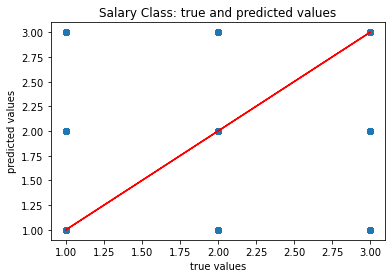

In [ ]:
plt.scatter(Y, rfc.predict(X))
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Salary Class: true and predicted values")
plt.show()

**COMPARISON OF CROSS VALIDATION SCORES**

Let's compare all model's cross validation scores as a plotbox. 

Text(0.5, 1.0, 'Comparing Cross Validation Scores')

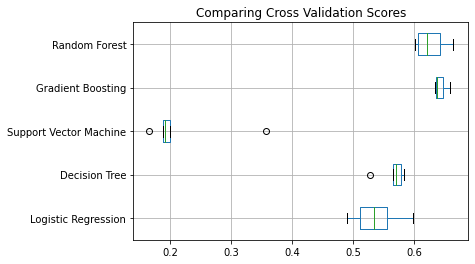

In [ ]:
d = {'Logistic Regression': lr_cv_array,  'Decision Tree': dtc_cv_array, 
     'Support Vector Machine': svr_cv_array, 'Gradient Boosting': gbc_cv_array, 'Random Forest': rfc_cv_array} 
df =pd.DataFrame(data=d)
df.plot.box(grid=True, vert=False)
plt.title('Comparing Cross Validation Scores')

**PRECISION RECALL F1 SCORES**



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [ ]:
x = nyc_job_last[['Job_Category', 'Level', 'Agency']]
y = nyc_job_last.Salary_Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
fbeta_precision = fbeta_score(y_test, predictions,  0.5, average='macro')
fbeta_recall = fbeta_score(y_test, predictions, 2, average='macro')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.41
Precision score: 0.34
Recall score: 0.34
F1 score: 0.31
Fbeta score favoring precision: 0.32
FBeta score favoring recall: 0.33


In [ ]:
x = nyc_job_last[['Job_Category', 'Level', 'Agency']]
y = nyc_job_last.Salary_Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
fbeta_precision = fbeta_score(y_test, predictions,  0.5, average='macro')
fbeta_recall = fbeta_score(y_test, predictions, 2, average='macro')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.36
Precision score: 0.33
Recall score: 0.33
F1 score: 0.33
Fbeta score favoring precision: 0.33
FBeta score favoring recall: 0.33


In [ ]:
predictions = gbc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
fbeta_precision = fbeta_score(y_test, predictions,  0.5, average='macro')
fbeta_recall = fbeta_score(y_test, predictions, 2, average='macro')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.38
Precision score: 0.34
Recall score: 0.34
F1 score: 0.34
Fbeta score favoring precision: 0.34
FBeta score favoring recall: 0.34


In [ ]:
predictions = dtc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
fbeta_precision = fbeta_score(y_test, predictions,  0.5, average='macro')
fbeta_recall = fbeta_score(y_test, predictions, 2, average='macro')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.42
Precision score: 0.29
Recall score: 0.32
F1 score: 0.27
Fbeta score favoring precision: 0.27
FBeta score favoring recall: 0.29


Decision Tree Classifier:

Score is not supported for multilabel classifiers. 

**^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^**

**As a conclusion of Supervised Learning;**

I have 6 different scores to compare the models, which are;

R^2, Cross validation score mean, Cross validation score std, Precision score, Recall score and  F1 score.


Each model may have some pros and cons. However, based on above selected scores and analysis run accordingly, Random Forest model and Gradient Boosting model are the best performing models to explain Salary Class. Among these 2 model I prefer to move with Random Forest model as it's R^2 is slightly higher than Gradient Boosting. 

Although it is less interpretable, the predictive performance of Random Forest model is always on top and it also provides a reliable feature importance estimate.

**^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^**

**Room for Improvement**

This project would have provided better solutions if;

*   Year data is well-balanced and I would run time series analysis to see what changes on a year basis in terms of requirement, preferred skills or number of position.

*   I have more numeric data,  I would definitely provide better solution especially for Supervised Learning side. 
*   I have more number of row even in the same year, I would provide better solution.
*   Data entrance were done more carefully, I would provide better solutions. For example, I initially wanted to calculate how long does it take to close the job opening. If data entrance were better, I would run the analysis on a business title, agency or position base. But unfortunately there were too much missing values or faulty input for Post Until and Process Date columns which prevent me to conduct such an analysis.

If NY City officials can manage the data entrance process in a more productive way, this project produce better solution with the same codes. 

Of course this is real world data and there is nothing unexpected. What I try to find is to reach the best possible solution under given conditions.

Thank you.

***Mehmet Ozkemah***




**^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^**